## Environment Setup


In [17]:
import random
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import requests
from sklearn.model_selection import train_test_split
from utilities.utils import get_housing_dataset

print("Version information")

print("python: {}".format(sys.version))
print("matplotlib: {}".format(matplotlib.__version__))
print("numpy: {}".format(np.__version__))

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

Version information
python: 3.12.6 (main, Nov 23 2024, 19:17:47) [Clang 16.0.0 (clang-1600.0.26.4)]
matplotlib: 3.7.5
numpy: 1.26.4
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Coding and Emissions

Coding and computational research contribute to greenhouse gas emissions. The main source of these emissions is the power draw of computers during compute- and data-intensive computational analyses. In 2020, the sector of information and communication technologies was responsible for between 1.8% and 2.8% of GHG emissions, surprisingly more than the sector of aviation <sup>[<a href="https://www.nature.com/articles/s43588-023-00506-2">1</a>]</sup>. Machine learning models, especially large ones, can consume significant amounts of energy during training and inference, which contributes to greenhouse gas emissions. Artificial intelligence, including large language models, is also a significant emitter of carbon <sup>[<a href="https://www.nature.com/articles/s42256-022-00529-w">2</a>]</sup>.

Carbon footprint of coding impacts several Sustainable Development Goals (SDGs), particularly SDG 13 (Climate Action) and SDG 12 (Responsible Consumption and Production).<sup>[<a href="https://www.undp.org/sustainable-development-goals">3</a>]</sup> This means writing clean and efficient code transcends functionality—it’s an environmental imperative. As coders, we can play a role in mitigating this impact.

### Measuring Our Impact:

CodeCarbon estimates the amount of CO2 produced by the cloud or personal computing resources used to execute the code<sup>[<a href="https://codecarbon.io/">4</a>]</sup> . 

Using CodeCarbon in your upcoming assignment will help you understand the environmental impact of your code and explore ways to reduce it.


In [18]:
from codecarbon import EmissionsTracker

tracker = EmissionsTracker()
tracker.start()

[codecarbon INFO @ 22:20:25] [setup] RAM Tracking...
[codecarbon INFO @ 22:20:25] [setup] GPU Tracking...
[codecarbon INFO @ 22:20:25] No GPU found.
[codecarbon INFO @ 22:20:25] [setup] CPU Tracking...
[codecarbon WARNING @ 22:20:25] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon WARNING @ 22:20:25] We saw that you have a Apple M3 Max but we don't know it. Please contact us.
[codecarbon INFO @ 22:20:25] CPU Model on constant consumption mode: Apple M3 Max
[codecarbon INFO @ 22:20:25] >>> Tracker's metadata:
[codecarbon INFO @ 22:20:25]   Platform system: macOS-15.1.1-arm64-arm-64bit
[codecarbon INFO @ 22:20:25]   Python version: 3.12.6
[codecarbon INFO @ 22:20:25]   CodeCarbon version: 2.8.0
[codecarbon INFO @ 22:20:25]   Available RAM : 64.000 GB
[codecarbon INFO @ 22:20:25]   CPU count: 16
[codecarbon INFO @ 22:20:25]   CPU model: Apple M3 Max
[codecarbon INFO @ 22:20:25] 

# 1: Two Layer Neural Network [80 pts; 55pts + 25pts Grad / 3.3% Undergrad Bonus] <span style="color:blue">**[P]**</span>


## 1.1 NN Implementation [65pts; 50pts + 15pts Grad / 2% Bonus for Undergrad] <span style="color:blue">**[P]**</span>

In this section, you will implement a two layer fully connected neural network to perform a Classification Task. You will also experiment with different activation functions and optimization techniques. We provide two activation functions here - SiLU and Softmax. You will implement a neural network where the first hidden layer uses a SiLU activation and the output layer uses Softmax.

You'll also implement Gradient Descent (GD) and Batch Gradient Descent (BGD) algorithms for training these neural nets. **GD is mandatory for all. BGD is bonus for undergraduate students but mandatory for graduate students.**

In the <strong>NN.py</strong> file, complete the following functions:

- <strong>silu</strong>
- <strong>derivative_silu</strong>
- <strong>softmax</strong>
- <strong>cross_entropy_loss</strong>
- <strong>\_dropout</strong>
- <strong>forward</strong>
- <strong>compute_gradients</strong>
- <strong>update_weights</strong>
- <strong>backward</strong>
- <strong>gradient_descent</strong>
- <strong>batch_gradient_descent</strong>:<span style="color:darkred"> **Mandatory for graduate students, bonus for undergraduate students.**</span> Please batch your data in a wraparound manner. For example, given a dataset of 9 numbers, [1, 2, 3, 4, 5, 6, 7, 8, 9], and a batch size of 6, the first iteration batch will be [1, 2, 3, 4, 5, 6], the second iteration batch will be [7, 8, 9, 1, 2, 3], the third iteration batch will be [4, 5, 6, 7, 8, 9], etc...

We'll train this neural network on sklearn's California Housing dataset.


## Activation Function

There are many activation functions that are used for various purposes. For this question, we use SiLU and the softmax activation functions. We encourage you to explore the plethora of options, many of which are listed on [Wikipedia](https://en.wikipedia.org/wiki/Activation_function).


### Sigmoid

The sigmoid function is a non-linear function with an S-shaped curve and is regarded as a foundational activation function. Its output is in the range $(0, 1)$, making it the function to use for binary classification output. The function is expressed as $$o = \phi(u)=\frac{1}{1+e^{-u}}$$<br> The derivation of the sigmoid function is given by $$o' = \phi'(u) = \frac{1}{1+e^{-u}} \left(1-\frac{1}{1+e^{-u}}\right) = o(1-o)$$

<b>Note:</b> We do not use sigmoid in this homework; it is only included for the sake of completeness.

![sigmoid](data/images/sigmoid.png)


### Softmax

Softmax is a common activation function used in neural networks, especially for multiclass classification problems like the one we are tackling. It is used to convert a vector of raw outputs from the last layer of the Neural Network into a probability distribution over multiple classes. The softmax function takes as input a vector of real numbers and transforms them into a probability distribution, ensuring that the probabilities sum to 1.

Mathematically, given an input vector of [x1, x2, ..., xn], the softmax function calculates the probability p(y=i) for each class i as follows:

p(y=i) = $e^{xi} / (e^{x1} + e^{x2} + ... + e^{xn})$

![sigmoid](data/images/softmax.png)

As discussed in class, the equation that we will use in this Neural network accounts for both the x values and the weights:

![sigmoid](data/images/softmaxNew.jpg)

<strong>TODO:</strong> Implement the function <strong>softmax</strong> in <strong>NN.py</strong>.


In [19]:
from utilities.localtests import TestNN

TestNN("test_softmax").test_softmax()

test_softmax passed!


### SiLU (Sigmoid Linear Unit)

The Sigmoid Linear Unit (SiLU), also known as the Swish activation function, is defined as:

$$
o = \phi(u) = u \cdot \sigma(u)
$$

where $\sigma(u)$ is the sigmoid function:

$$
\sigma(u) = \frac{1}{1 + e^{-u}}
$$

![SiLU](data/images/silu.png)

The derivative of SiLU, $\phi'(u)$, is given by:

$$
\phi'(u) = \sigma(u) \cdot (1 + u \cdot (1 - \sigma(u)))
$$

Unlike ReLU, SiLU is a smooth and non-linear activation function that retains gradients for negative inputs, which helps during training by improving gradient flow and enabling better convergence.

In this homework, we implement SiLU.

![Derivate SiLu](data/images/derivative_silu.png)

<strong>TODO:</strong> Implement the function <strong>silu</strong> and <strong>derivative_silu</strong> in <strong>NN.py</strong>.



In [20]:
from utilities.localtests import TestNN

TestNN("test_silu").test_silu()
TestNN("test_d_silu").test_d_silu()

test_silu passed!
test_d_silu passed!


### Perceptron

A single layer perceptron can be thought of as a linear hyperplane as in logistic regression followed by a non-linear activation function. $$u_{i} = \sum \limits_{j=1}^{d} \theta_{ij}x_{j}+b_{i}$$ $$o_{i} = \phi \left( \sum \limits_{j=1}^{d} \theta_{ij}x_{j}+b_{i} \right) = \phi(\theta_{i}^{T}x+b_{i})$$ where $x$ is a d-dimensional vector i.e. $x \in R^{d}$. It is one datapoint with $d$ features. $\theta_{i} \in R^{d}$ is the weight vector for the $i^{th}$ hidden unit, $b_{i} \in R$ is the bias element for the $i^{th}$ hidden unit and $\phi(.)$ is a non-linear activation function that has been described below. $u_{i}$ is a linear combination of the features in $x_j$ weighted by $\theta_{i}$ whereas $o_{i}$ is the $i^{th}$ output unit from the activation layer.


## Fully connected Layer

Typically, a modern neural network contains millions of perceptrons as the one shown in the previous image. Perceptrons interact in different configurations such as cascaded or parallel. In this part, we describe a fully connected layer configuration in a neural network which comprises multiple parallel perceptrons forming one layer.

We extend the previous notation to describe a fully connected layer. Each layer in a fully connected network has a number of input/hidden/output units cascaded in parallel. Let us a define a single layer of the neural net as follows: <br>
$m$ denotes the number of hidden units in a single layer $l$ whereas $n$ denotes the number of units in the previous layer $l-1$.
$$u^{[l]}=\theta^{[l]}o^{[l-1]}+b^{[l]}$$
where $u^{[l]} \in R^{m}$ is a m-dimensional vector pertaining to the hidden units of the $l^{th}$ layer of the neural network after applying linear operations. Similarly, $o^{[l-1]} \in R^{n}$ is the n-dimensional output vector corresponding to the hidden units of the $(l-1)^{th}$ activation layer. $\theta^{[l]} \in R^{m \times n}$ is the weight matrix of the $l^{th}$ layer where each row of $\theta^{[l]}$ is analogous to $\theta_{i}$ described in the previous section i.e. each row corresponds to one hidden unit of the $l^{th}$ layer. $b^{[l]} \in R^{m}$ is the bias vector of the layer where each element of b pertains to one hidden unit of the $l^{th}$ layer. This is followed by element wise non-linear activation function $o^{[l]} = \phi(u^{[l]})$.
The whole operation can be summarized as,
$$o^{[l]} = \phi(\theta^{[l]}o^{[l-1]}+b^{[l]}) $$
where $o^{[l-1]}$ is the output of the previous layer.


## Dropout

A dropout layer is a regularization technique used in neural networks to reduce overfitting. During training, a dropout layer looks at each input unit and randomly decide if it will be dropped (set to zero) with some given probability $p$. The decision for each unit is made independently. Formally, given an input of shape $N \times K$ (where $N$ is the number of data points and $K$ is the number of features), it samples from $\text{Bernoulli}(p)$ for each unit, resulting in an output where approximately $pNK$ of the units are zero (in expectation). This forces the network to learn more robust and generalizable features, since it cannot rely too much on any particular input. During inference, the dropout layer is turned off, and the full network is used to make predictions.

The dropout probability $p$ is a hyperparameter than can be tuned to adjust the strength of regularization. Setting $p=0$ is equivalent to no dropout.

Note that the derivative of $\text{dropout}(u)$ with respect to $u$ has the same shape as $u$. The values of the derivative depend on the random mask.

Use [this](https://d2l.ai/chapter_multilayer-perceptrons/dropout.html) as a reference for your implementation.

Note that after applying the mask, we must scale the result by a factor of $1/(1-p)$. Why is this necessary?

<strong>TODO:</strong> Implement the <strong>\_dropout</strong> function in <strong>NN.py</strong>.


In [21]:
from utilities.localtests import TestNN

TestNN("test_dropout").test_dropout()

test_dropout passed!


## Cross Entropy Loss

Cross-Entropy Loss is a widely used loss function in machine learning and deep learning, especially for classification tasks. It measures the dissimilarity between the predicted probability distribution and the true probability distribution of a classification problem. If it is closer to zero, the better the learnt function is.

### Implementation details

For classification problems as in this exercise, we compute the loss as follows:

\begin{align*}
CE = -\frac{1}{N}\sum\limits_{i=1}^{N}\left(y_{i} \cdot log(\hat{y_{i}})\right)
\end{align*}

where $y_{i}$ is the true label and $\hat{y_{i}}$ is the estimated label.

<strong>TODO:</strong> Implement the <strong>cross_entropy_loss</strong> function in <strong>NN.py</strong>.


In [22]:
from utilities.localtests import TestNN

TestNN("test_loss").test_loss()

test_loss passed!


## Neural Network Architecture

_The architecture of our neural network._

![Neural Network](data/images/nn.jpg)

The above diagram shows the dimensions of the neural network you will implement, along with the relationships between the quantities. Note that the neural network consists of two hidden linear layers, each followed by a SiLU activation function. The logits outputted by the second hidden linear layer are then passed through the softmax function, which turns them into probability distributions over the 3 classes.

Here is a helpful [guide](https://static.us.edusercontent.com/files/gznuqr6aWHD8dPhiusG2TG53) that walks through the matrix multiplication operations and shapes involved in a forward and backward pass.
  
  <font color='darkred'>
<strong> Note: Implement drop out function only on the first hidden layer! </strong>
</font>

In [23]:
from utilities.localtests import TestNN

TestNN("test_forward_without_dropout").test_forward_without_dropout()
TestNN("test_forward").test_forward()

test_forward_without_dropout passed!
test_forward passed!


## Backward Propagation: Update Weights and Compute Gradients

After the forward pass, we do back propagation to update the weights and biases in the direction of the negative gradient of the loss function.

### Update Weights

So, we update the weights and biases using the following formulas
\begin{align*}
\theta^{[3]} := \theta^{[3]} - lr \times \frac{\partial l}{\partial \theta^{[3]}} \\
b^{[3]} := b^{[3]} - lr \times \frac{\partial l}{\partial b^{[3]}} \\
\theta^{[2]} := \theta^{[2]} - lr \times \frac{\partial l}{\partial \theta^{[2]}} \\
b^{[2]} := b^{[2]} - lr \times \frac{\partial l}{\partial b^{[2]}} \\
\theta^{[1]} := \theta^{[1]} - lr \times \frac{\partial l}{\partial \theta^{[1]}} \\
b^{[1]} := b^{[1]} - lr \times \frac{\partial l}{\partial b^{[1]}}
\end{align*}
where $lr$ is the learning rate. It decides the step size we want to take in the direction of the negative gradient.

<strong>TODO:</strong> Implement the <strong>update_weights</strong> function in <strong>NN.py</strong> with use_momentum=False.

Hint: Refer to this [guide](https://static.us.edusercontent.com/files/gznuqr6aWHD8dPhiusG2TG53) for more detail on the backward pass. 

In [24]:
from utilities.localtests import TestNN

TestNN("test_update_weights").test_update_weights()

test_update_weights passed!


### Update Weights with Momentum [Bonus for Undergrad]

Gradient descent does a generally good job of facilitating the convergence of the model's parameters to minimize the loss function. However, the process of doing so can be slow and/or noisy. **Momentum** is a technique used to stabilize this convergence.

As a reminder, vanilla gradient descent applies the following update function to the parameters:

$$
\begin{equation}
\theta_{t+1} = \theta_t - \alpha \nabla f(\theta_t)
\end{equation}
$$

where $\theta_t$ represents the parameters at time $t$, $\alpha$ represents the learning rate, and $f$ is the loss function.

Momentum proposes the following tweak to our parameter update function:

$$
\begin{align*}
z_{t+1} &= \beta z_t + \nabla f(\theta_t) \\
\theta_{t+1} &= \theta_t - \alpha z_{t+1}
\end{align*}
$$

where $\beta \in [0, 1]$ is the momentum constant and $z_t$ represents the momentum records at time $t$.

You can think of momentum as taking our previous changes into consideration. If we've been moving in a certain direction recently, it's likely we should keep moving in that direction. The recurrence relation given shows that we use an exponentially-weighted average of the previous updates for our current update.

A useful analogy about momentum from [this great article on Distill](https://distill.pub/2017/momentum/):

> Here’s a popular story about momentum: gradient descent is a man walking down a hill. He follows the steepest path downwards; his progress is slow, but steady. Momentum is a heavy ball rolling down the same hill. The added inertia acts both as a smoother and an accelerator, dampening oscillations and causing us to barrel through narrow valleys, small humps and local minima.

<strong>TODO:</strong> Implement the <strong>update_weights</strong> function in <strong>NN.py</strong> with use_momentum=True.

**HINT**: $z$ is stored in `self.change`


In [25]:
from utilities.localtests import TestNN

TestNN("test_update_weights_with_momentum").test_update_weights_with_momentum()

test_update_weights_with_momentum passed!


### Compute Gradients


In order to compute the gradients of the loss with respect to each parameter, we use the equations that make up the forward pass:
\begin{align*}
u_1 &= \theta_1 X + b_1 \\
o_1 &= \text{silu}(u_1) \\
u_2 &= \theta_2 o_1 + b_2 \\
o_2 &= \text{silu}(u_2)\\
u_3 &= \theta_3 o2 + b_3\\
o_3 &= \text{softmax}(u_3) \\
l &= \text{cross\_entropy}(o_3)
\end{align*}

When computing gradients, we travel backwards from the loss all the way back ot the input. We first seek to obtain the derivative of the loss $l$ with respect to the logits $u_3$. Note that they have the relation $$ l = \text{cross\_entropy}(\text{softmax}(u_3))$$ Computing the derivative of this seems very involved, but it actually has a very elegant result: $$ \frac{\partial l}{\partial u_3} = \text{softmax}(u_3) - y = o_3 - y = \hat{y} - y. $$ where $\hat{y}$ is predicted y or $o_3$. 

While this is given to you, we encourage you to derive it for yourself! You can find a great explanation of the derivation [in this article](https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1).

Now that we have $\frac{\partial l}{\partial u_3}$, we seek to move further back and compute $\frac{\partial l}{\partial \theta_3}$ and $\frac{\partial l}{\partial b_3}$. This is done using the chain rule:
\begin{align*}
\frac{\partial l}{\partial \theta_3} &= \frac{\partial l}{\partial u_3} \cdot \frac{\partial u_3}{\partial \theta_3} \\
\frac{\partial l}{\partial b_3} &= \frac{\partial l}{\partial u_3} \cdot \frac{\partial u_3}{\partial b_3}.
\end{align*}

The quantities $\frac{\partial u_3}{\partial \theta_3}$ and $\frac{\partial u_3}{\partial b_3}$ are easy to derive from the relation $u_3 = \theta_3 o_2 + b_3$. We see that
\begin{align*}
\frac{\partial l}{\partial \theta_3} &= \frac{\partial l}{\partial u_3} \cdot o_2 \\
\frac{\partial l}{\partial b_3} &= \frac{\partial l}{\partial u_3} \cdot 1.
\end{align*}

Note that the derivative involves $o_2$, which we computed during the forward pass. Fortunately, we saved that value in `self.cache`, so we don't need to compute it again!

The same procedure is repeated to obtain the gradients for the upstream parameters $\theta_2$ and $b_2$. We must first perform the intermediate steps of computing the derivative of the loss with respect to $o_2$ and then $u_2$. These are given by
\begin{align*}
\frac{\partial l}{\partial o_2} &= \frac{\partial l}{\partial u_3} \cdot \theta_3 \\
\frac{\partial l}{\partial u_2} &= \frac{\partial l}{\partial o_2} \cdot \frac{\partial\,\text{SiLu}}{\partial u_2}.
\end{align*}

The same procedure is repeated to obtain the gradients for the upstream parameters $\theta_1$ and $b_1$. We must first perform the intermediate steps of computing the derivative of the loss with respect to $o_1$ and then $u_1$. These are given by
\begin{align*}
\frac{\partial l}{\partial o_1} &= \frac{\partial l}{\partial u_2} \cdot \theta_2 \\
\frac{\partial l}{\partial u_1} &= \frac{\partial l}{\partial o_1} \cdot \frac{\partial\,\text{SiLu}}{\partial u_1}.
\end{align*}

In the second relation, we must consider our use of dropout! If we applied dropout on a particular neuron, it should not be adjusted. To account for this, in the case of `use_dropout=True`, we must instead use $$ \frac{\partial l}{\partial u_1} = \frac{\partial l}{\partial o_1} \cdot \frac{\partial\,\text{SiLu}}{\partial u_1} \cdot \text{dropout\_mask} \cdot \frac{1}{1-p}, $$ where $1 / (1-p)$ is the scaling factor and dropout_mask is stored in `self.cache`.

The final step! We can use these values to compute the gradients for $\theta_1$ and $b_1$, using the relation $u_1 = \theta_1 X + b_1$, which are given by
\begin{align*}
\frac{\partial l}{\partial \theta_1} &= \frac{\partial l}{\partial u_1} \cdot X \\
\frac{\partial l}{\partial b_1} &= \frac{\partial l}{\partial u_1} \cdot 1.
\end{align*}


### Implementation Tips

The above equations are given in matrix notation. When implementing these computations in code, the easiest way to make sure you are calculating the values correctly and in the right order is to check shapes. Any time you are doing a matrix/vector operation in NumPy, **check the shapes**.

Since we are computing these gradients over $N$ data points, we must divide the gradients by $N$ to take the _average_ gradient. Make sure you are dividing by $N$ exactly once, no more and no less!

<strong>TODO:</strong> Implement the <strong>compute_gradients</strong> function in <strong>NN.py</strong>.

<strong> Note: Implement drop out function only on the first hidden layer! </strong>

Hint: Refer to this [guide](https://static.us.edusercontent.com/files/gznuqr6aWHD8dPhiusG2TG53) for more detail on computing gradients.

In [26]:
from utilities.localtests import TestNN

TestNN(
    "test_compute_gradients_without_dropout"
).test_compute_gradients_without_dropout()
TestNN("test_compute_gradients").test_compute_gradients()

test_compute_gradients_without_dropout passed!
test_compute_gradients passed!


### 1.1.1 Local Test: Gradient Descent

You may test your implementation of the GD function contained in **NN.py** in the cell below. See [Using the Local Tests](#using_local_tests) for more details. Look at the function documentation in gradient_descent for guidance.

In [27]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
from utilities.localtests import TestNN

TestNN("test_gradient_descent").test_gradient_descent()

Loss after iteration 0: 1.086276
Loss after iteration 1: 1.086233
Loss after iteration 2: 1.086189

Your GD losses works within the expected range: True


### 1.1.2 Local Test: Batch Gradient Descent [No Points]

You may test your implementation of the BGD function contained in **NN.py** in the cell below. See [Using the Local Tests](#using_local_tests) for more details. Look at the function documentation in gradient_descent for guidance.


In [28]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from utilities.localtests import TestNN

TestNN("test_batch_gradient_descent").test_batch_gradient_descent()

Loss after iteration 0: 1.115501
Loss after iteration 1: 1.126577
Loss after iteration 2: 1.104060

Your BGD losses works within the expected range: True
Your batch_y works within the expected range: True


### 1.1.3 Local Test: Gradient Descent with Momentum


You may test your implementation of the GD function with momentum contained in **NN.py** in the cell below. See [Using the Local Tests](#using_local_tests) for more details. Revisit your implementation for update_weights.


In [29]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from utilities.localtests import TestNN

TestNN("test_gradient_descent_with_momentum").test_gradient_descent_with_momentum()

Loss after iteration 0: 1.086276
Loss after iteration 1: 1.086233
Loss after iteration 2: 1.086168

Your GD losses works within the expected range: True


## 1.2 Loss plot and cross-entropy(CE) value for NN with Gradient Descent [5pts] <span style="color:blue">**[P]**</span>

Train your neural network implementation with gradient descent and print out the loss at every 1000th iteration (starting at iteration 0). The following cells will plot the loss vs epoch graph and calculate the final test cross-entropy(CE).


In [30]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
from NN import NeuralNet
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

x_train, y_train, x_test, y_test = get_housing_dataset()

nn = NeuralNet(
    y_train, lr=0.01, use_dropout=False, use_momentum=False
)  # initalize neural net class
nn.gradient_descent(x_train, y_train, iter=60000)  # train

Loss after iteration 0: 1.086276
Loss after iteration 1000: 1.032790
Loss after iteration 2000: 0.903132
Loss after iteration 3000: 0.728430
Loss after iteration 4000: 0.656171
Loss after iteration 5000: 0.621733
Loss after iteration 6000: 0.598812
Loss after iteration 7000: 0.582288
Loss after iteration 8000: 0.570177
Loss after iteration 9000: 0.561003
Loss after iteration 10000: 0.553710
Loss after iteration 11000: 0.547769
Loss after iteration 12000: 0.543023
Loss after iteration 13000: 0.539342
Loss after iteration 14000: 0.536473
Loss after iteration 15000: 0.534156
Loss after iteration 16000: 0.532210
Loss after iteration 17000: 0.530515
Loss after iteration 18000: 0.528996
Loss after iteration 19000: 0.527603
Loss after iteration 20000: 0.526301
Loss after iteration 21000: 0.525063
Loss after iteration 22000: 0.523866
Loss after iteration 23000: 0.522691
Loss after iteration 24000: 0.521519
Loss after iteration 25000: 0.520332
Loss after iteration 26000: 0.519114
Loss after ite

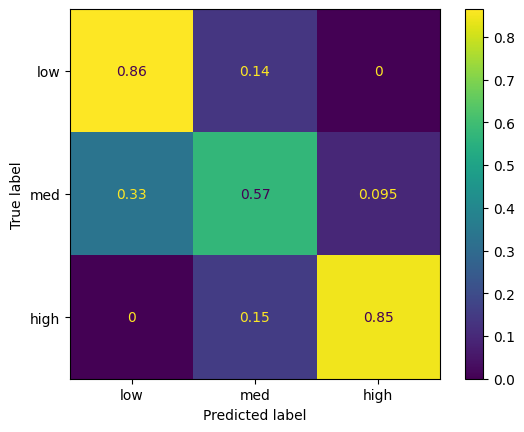

In [31]:
# Plot confusion matrix
y_true = np.argmax(y_test, axis=1)
y_pred = nn.predict(x_test)
display_labels = ["low", "med", "high"]
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, normalize="true", display_labels=display_labels
)
plt.show()

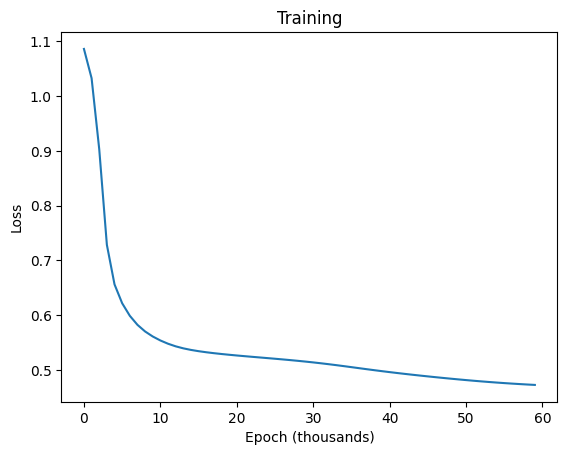

In [32]:
# Plot training loss
fig = plt.plot(np.array(nn.loss).squeeze())
plt.title(f"Training")
plt.xlabel("Epoch (thousands)")
plt.ylabel("Loss")
plt.show()

In [33]:
# Total loss
y_hat = nn.forward(x_test, use_dropout=False)
print("Cross entropy loss:", round(nn.cross_entropy_loss(y_test, y_hat), 3))

Cross entropy loss: 0.729


## 1.3 Loss plot and CE value for NN with BGD [5pts Grad / 0.7% Bonus for Undergrad] <span style="color:blue">**[P]**</span>

Train your neural network implementation with batch gradient descent and print out the loss at every 1000th iteration (starting at iteration 0). The following cells will plot the loss vs epoch graph and calculate the final test CE.


In [34]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
from NN import NeuralNet
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

x_train, y_train, x_test, y_test = get_housing_dataset()

nn = NeuralNet(
    y_train, lr=0.01, use_dropout=True, use_momentum=False
)  # initalize neural net class
nn.batch_gradient_descent(x_train, y_train, iter=60000, use_momentum=False)

Loss after iteration 0: 1.080808
Loss after iteration 1000: 1.038201
Loss after iteration 2000: 0.856940
Loss after iteration 3000: 0.710821
Loss after iteration 4000: 0.750909
Loss after iteration 5000: 0.519292
Loss after iteration 6000: 0.557617
Loss after iteration 7000: 0.720839
Loss after iteration 8000: 0.464138
Loss after iteration 9000: 0.506158
Loss after iteration 10000: 0.696114
Loss after iteration 11000: 0.430462
Loss after iteration 12000: 0.481005
Loss after iteration 13000: 0.673968
Loss after iteration 14000: 0.412155
Loss after iteration 15000: 0.468438
Loss after iteration 16000: 0.663359
Loss after iteration 17000: 0.402287
Loss after iteration 18000: 0.461305
Loss after iteration 19000: 0.658066
Loss after iteration 20000: 0.395409
Loss after iteration 21000: 0.455641
Loss after iteration 22000: 0.654137
Loss after iteration 23000: 0.390175
Loss after iteration 24000: 0.450540
Loss after iteration 25000: 0.649948
Loss after iteration 26000: 0.385982
Loss after ite

[codecarbon INFO @ 22:20:43] Energy consumed for RAM : 0.000100 kWh. RAM Power : 24.0 W
[codecarbon INFO @ 22:20:43] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:20:43] 0.000277 kWh of electricity used since the beginning.


Loss after iteration 48000: 0.424307
Loss after iteration 49000: 0.547006
Loss after iteration 50000: 0.360699
Loss after iteration 51000: 0.424491
Loss after iteration 52000: 0.536313
Loss after iteration 53000: 0.356805
Loss after iteration 54000: 0.425296
Loss after iteration 55000: 0.526729
Loss after iteration 56000: 0.353152
Loss after iteration 57000: 0.426470
Loss after iteration 58000: 0.518280
Loss after iteration 59000: 0.349817


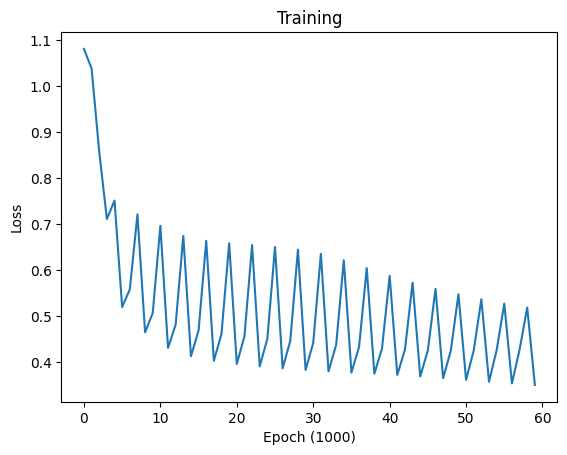

In [35]:
# Plot training loss
fig = plt.plot(np.array(nn.loss).squeeze())
plt.title(f"Training")
plt.xlabel("Epoch (1000)")
plt.ylabel("Loss")
plt.show()

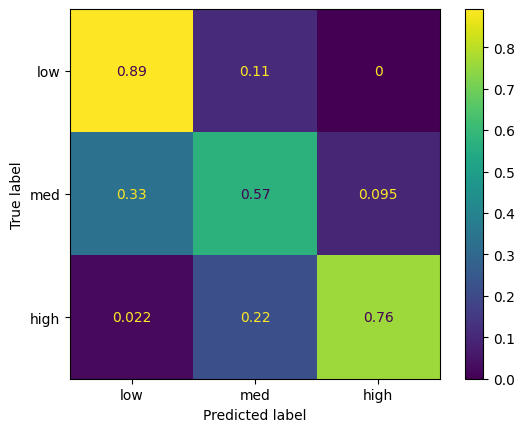

In [36]:
# Plot confusion matrix
y_true = np.argmax(y_test, axis=1)
y_pred = nn.predict(x_test)
display_labels = ["low", "med", "high"]
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, normalize="true", display_labels=display_labels
)
plt.show()

In [37]:
# Total loss
y_hat = nn.forward(x_test, use_dropout=False)
print("Cross entropy loss:", round(nn.cross_entropy_loss(y_test, y_hat), 3))

Cross entropy loss: 0.73


## 1.4 Loss plot and CE value for NN with Gradient Descent with Momentum [5pts Grad / 0.6% Bonus for Undergrad] <span style="color:blue">**[P]**</span>

Train your neural net implementation using gradient descent with momentum and print out the loss at every 1000th iteration (starting at iteration 0). The following cells will plot the loss vs epoch graph and calculate the final test CE.


In [38]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
from NN import NeuralNet
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

x_train, y_train, x_test, y_test = get_housing_dataset()

nn = NeuralNet(
    y_train, lr=0.01, use_dropout=False, use_momentum=True
)  # initalize neural net class
nn.gradient_descent(x_train, y_train, iter=60000, use_momentum=True)  # train

Loss after iteration 0: 1.086276
Loss after iteration 1000: 0.904120
Loss after iteration 2000: 0.656440
Loss after iteration 3000: 0.598945
Loss after iteration 4000: 0.570251
Loss after iteration 5000: 0.553760
Loss after iteration 6000: 0.543053
Loss after iteration 7000: 0.536490
Loss after iteration 8000: 0.532221
Loss after iteration 9000: 0.529004
Loss after iteration 10000: 0.526308
Loss after iteration 11000: 0.523874
Loss after iteration 12000: 0.521527
Loss after iteration 13000: 0.519123
Loss after iteration 14000: 0.516534
Loss after iteration 15000: 0.513655
Loss after iteration 16000: 0.510424
Loss after iteration 17000: 0.506868
Loss after iteration 18000: 0.503132
Loss after iteration 19000: 0.499435
Loss after iteration 20000: 0.495933
Loss after iteration 21000: 0.492660
Loss after iteration 22000: 0.489586
Loss after iteration 23000: 0.486679
Loss after iteration 24000: 0.483932
Loss after iteration 25000: 0.481358
Loss after iteration 26000: 0.478988
Loss after ite

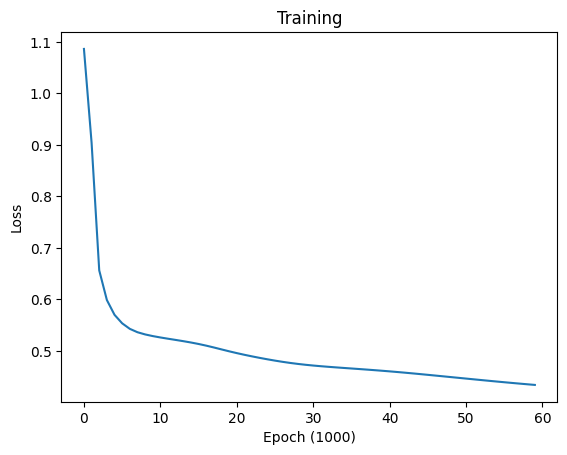

In [39]:
# Plot training loss
fig = plt.plot(np.array(nn.loss).squeeze())
plt.title(f"Training")
plt.xlabel("Epoch (1000)")
plt.ylabel("Loss")
plt.show()

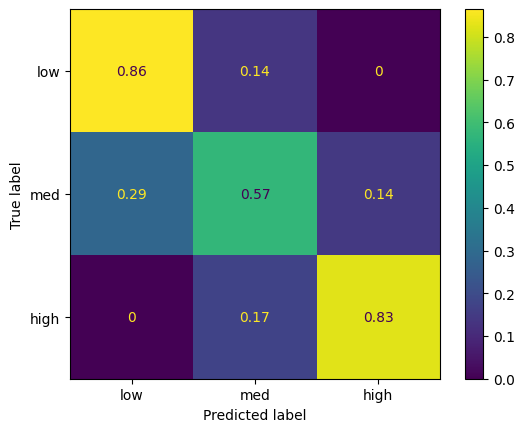

In [40]:
# Plot confusion matrix
y_true = np.argmax(y_test, axis=1)
y_pred = nn.predict(x_test)
display_labels = ["low", "med", "high"]
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, normalize="true", display_labels=display_labels
)
plt.show()

In [41]:
# Total loss
y_hat = nn.forward(x_test, use_dropout=False)
print("Cross entropy loss:", round(nn.cross_entropy_loss(y_test, y_hat), 3))

Cross entropy loss: 0.696


# 2: Image Classification based on Convolutional Neural Networks [20pts: 20pts Grad / 2.7% Bonus for Undergrad + 1.1% Bonus for all] <span style="color:blue">**[P]**</span><span style="color:green">**[W]**</span>


## 2.1 Image Classification using Pytorch and CNN [20pts Grad / 2.7% Bonus for Undergrad] <span style="color:blue">**[P]**</span><span style="color:green">**[W]**</span>

**Pytorch Description**

[Pytorch](https://pytorch.org) is a Machine Learning/Deep Learning tensor library based on Python and Torch that uses dynamic computation graphs. Pytorch is used for applications using GPUs and CPUs.

**Helpful Links**

- [Install Pytorch](https://pytorch.org/get-started/locally/)
- [Pytorch Quickstart Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)


**Setup Pytorch**

Make sure you installed pytorch and torchvision (directions [here](https://pytorch.org/get-started/locally/)).

Please also see [Pytorch Quickstart Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) to see how to load a data set, build a training loop, and test the model. Another good resource for building CNNs using Pytorch is [here](https://pyimagesearch.com/2021/07/19/pytorch-training-your-first-convolutional-neural-network-cnn/).


### Environment Setup


In [42]:
import torch
import torchvision
from torch.utils.data import non_deterministic
from torchvision.transforms import v2

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2.1.1 Load FashionMNIST Dataset and Data Augmentation [5pts - Bonus for Undergrad]


We use [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset to train our model. This is a dataset of 70,000 28x28 grayscale images in 10 classes. There are 60,000 training images and 10,000 test images. We provide code for you to download Fashion-MNIST dataset below.

#### Data Augmentation [5pts]

Data augmentation is a technique to increase the diversity of your training set by applying random (but realistic) transformations such as image rotation and flipping the image around an axis. If the dataset in a machine learning model is rich and sufficient, the model performs better and more accurately. We will preprocess the training and testing set, but only the training set will undergo augmentation.

Go through the [Pytorch torchvision.transforms.v2 documentation](https://pytorch.org/vision/master/transforms.html) to see how to apply multiple transformations at once.

In the <strong>cnn_image_transformations.py</strong> file, complete the following functions to understand the common practices used for preprocessing and augmenting the image data:

- <strong>create_training_transformations</strong>

  - In this function, you are going to preprocess and augment training data.

    - PREPROCESS: Convert the given PIL Images to Tensors

    - AUGMENTATION: Apply Random Horizontal Flip and Random Rotation

- <strong>create_testing_transformations</strong>

  - In this function, you are going to only preprocess testing data.

    - PREPROCESS: Convert the given PIL Images to Tensors

Please note that the Gradescope only checks if expected preprocessing layers are existent.

**References**

[v2.Compose()](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.Compose.html)

[v2.ToTensor()](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.ToTensor.html) (Hint: Look at the warning)

[v2.RandomHorizontalFlip()](https://pytorch.org/vision/main/generated/torchvision.transforms.RandomHorizontalFlip.html)

[v2.RandomApply()](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.RandomApply.html)

[v2.RandomRotation()](https://pytorch.org/vision/main/generated/torchvision.transforms.RandomRotation.html)

[Article about performance regarding transformations](https://pytorch.org/vision/master/transforms.html)


In [43]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from cnn_image_transformations import (
    create_testing_transformations,
    create_training_transformations,
)

# Create Transformations
training_transformations = create_training_transformations()
testing_transformation = create_testing_transformations()

# Load data
trainset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=training_transformations
)
testset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=testing_transformation
)

classes = (
    "Top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
)

print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


### Load some sample images from Fashion-MNIST [Setup - No points]


[codecarbon INFO @ 22:20:58] Energy consumed for RAM : 0.000200 kWh. RAM Power : 24.0 W
[codecarbon INFO @ 22:20:58] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:20:58] 0.000554 kWh of electricity used since the beginning.


Image size
[28, 28]


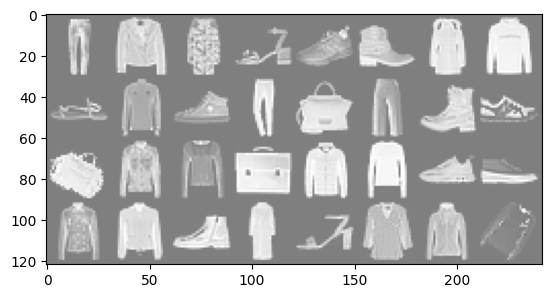

In [44]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

import matplotlib.pyplot as plt
import numpy as np

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=32, shuffle=True, num_workers=2
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=32, shuffle=False, num_workers=2
)

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

print("Image size")
print(v2.functional.get_size(images[0]))

# show images
imshow(torchvision.utils.make_grid(images))

As you can see from above, the FashionMNIST dataset contains different types of objects. The images have been size-normalized and objects remain centered in fixed-size images.


### 2.1.2 Build convolutional neural network model [5pts Grad / 0.7% Bonus for Undergrad] <span style="color:green">**[W]**</span>


In this part, you need to build a convolutional neural network as described below. The architecture of the model is outlined.

In the <strong>cnn.py</strong> file, complete the following functions:

- <strong> \_\_init\_\_</strong>: See Defining Variables section
- <strong>forward</strong>: See Defining Model section

**[INPUT - CONV - CONV - MAXPOOL - DROPOUT - CONV - CONV - MAXPOOL - DROPOUT - AVERAGEPOOL - FC1 - DROPOUT - FC2 - DROPOUT - FC3]**

> INPUT: [$28\times28\times1$] will hold the raw pixel values of the image, in this case, an image of width 28, height 28. This layer should give 8 filters and have appropriate padding to maintain shape.

> CONV: Conv. layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to the input volume. In our example architecture, we decide to set the kernel_size to be $3\times3$. For example, the output of the Conv. layer may look like $[28\times28\times8]$ if we set out_channels to be 8 and use appropriate paddings to maintain shape.

> CONV: Additional Conv. layer take outputs from above layers and applies more filters. We set the kernel_size to be $3\times3$ and out_channels to be 32.

> MAXPOOL: MAXPOOL layer will perform a downsampling operation along the spatial dimensions (width, height). With pool size of $2\times2$, resulting shape takes form $16\times16$.

> DROPOUT: DROPOUT layer with the dropout rate of 0.2 to prevent overfitting.

> CONV: Additonal Conv. layer takes outputs from above layers and applies more filters. We set the kernel_size to be $3\times3$ and out_channels to be 32. Appropriate paddings are used to maintain shape.

> CONV: Additonal Conv. layer takes outputs from above layers and applies more filters. We set the kernel_size to be $3\times3$ and out_channels to be 64. Appropriate paddings are used to maintain shape.

> MAXPOOL: MAXPOOL layer will perform a downsampling operation along the spatial dimensions (width, height).

> DROPOUT: Dropout layer with the dropout rate of 0.2 to prevent overfitting.

> AVERAGEPOOL: AVERAGEPOOL layer will perform a downsampling operation along the spatial dimension (width, height). Checkout AdaptiveAvgPool2d below.

> FC1: Dense layer which takes output from above layers, and has 256 neurons. Flatten() operations may be useful.

> DROPOUT: Dropout layer with the dropout rate of 0.2 to prevent overfitting.

> FC2: Dense layer which takes output from above layers, and has 128 neurons.

> DROPOUT: Dropout layer with the dropout rate of 0.2 to prevent overfitting.

> FC3: Dense layer with 10 neurons, and Softmax activation, is the final layer. The dimension of the output space is the number of classes.

**Activation function**: Use LeakyReLU with negative_slope 0.01 as the activation function for Conv. layers and Dense layers unless otherwise indicated to build you model architecture

Note that while this is a suggested model design, you may use other architectures and experiment with different layers for better results.

The following links are Pytorch documentation for the layers you are going to use to build the CNN.

- [Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
- [Dense](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- [MaxPool](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)
- [AdaptiveAvgPool2d](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html)
- [Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)
- [LeakyReLU](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html)
- [Flatten](https://pytorch.org/docs/stable/generated/torch.flatten.html)

Lastly, if you would like to experiment with additional layers, explore the [torch.nn api](https://pytorch.org/docs/stable/nn.html).


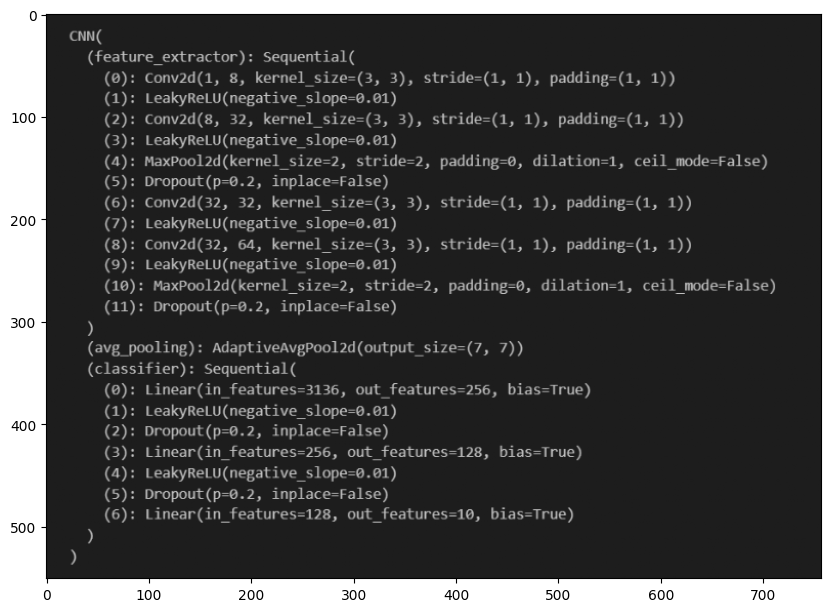

In [45]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# Show the architecture of the model
achi = plt.imread("./data/images/Architecture.png")
fig = plt.figure(figsize=(10, 10))
plt.imshow(achi)

#### Defining model [5pts Grad / 0.7% Bonus for Undergrad]<span style="color:green">**[W]**</span>


You now need to complete the `__init__()` function and the `forward()` function in <strong>cnn.py</strong> to define your model structure.

Your model is required to have at least 2 convolutional layers and at least 2 dense layers. Ensuring that these requirements are met will earn you 5pts.

Once you have defined a model structure you may use the cell below to examine your architecture.


In [46]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# You can compare your architecture with the 'Architecture.png'

from cnn import CNN

net = CNN()
print(net)

CNN(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avg_pooling): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential(
    (0): Linear(in_features=1568, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


### 2.1.3 Train the network [8pts Grad / 1% Bonus for Undergrad] <span style="color:green">**[W]**</span>


**Tuning:** Training the network is the next thing to try. You can set the hyperparameters in the cell below. If your hyperparameters are set properly, you should see the loss of the validation set decreased and the value of accuracy increased. <strong>It may take more than 15 minutes to train your model. </strong>

- Recommended Batch Sizes fall in the range 32-512 (use powers of 2)

- Recommended Epoch Counts fall in the range 5-20

- Recommended Learning Rates fall in the range .0001-.01

**Expected Result:** You should be able to achieve more than $90\%$ accuracy on the test set to get full points. If you achieve accuracy between $75\%$ to $84\%$, you will only get 3 points. An accuracy between $84\%$ to $90\%$ will earn an additional 3pts.

Note: If you would like to automate the tuning process, you can use a nested for loop to search for the hyperparameter that achieves the accuracy. You could also look into [grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) for hyperparameter optimization.

- $75\%$ to $84\%$ earns 3pts
- $84\%$ to $90\%$ earns 3pts more (6pts total)
- $90\%$+ earns 2pts more (8pts total)


#### Train your own CNN model


In [47]:
from cnn import CNN
from cnn_trainer import Trainer

net = CNN()

# TODO: Change hyperparameters here
num_epochs = 10
batch_size = 32
init_lr = 5e-3

# Choose best device to speed up training
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print(f"Using {device} device")

trainer = Trainer(
    net,
    trainset,
    testset,
    num_epochs=num_epochs,
    batch_size=batch_size,
    init_lr=init_lr,
    device=device,
)
trainer.train()

Using mps device


Epoch 1/10: 100%|██████████| 1875/1875 [00:09<00:00, 188.38batch/s, accuracy=0.806, loss=0.533]


Epoch 1: Validation Loss: 0.38, Validation Accuracy: 0.859


Epoch 2/10:  12%|█▏        | 217/1875 [00:02<00:08, 202.24batch/s, accuracy=0.858, loss=0.382][codecarbon INFO @ 22:21:13] Energy consumed for RAM : 0.000300 kWh. RAM Power : 24.0 W
[codecarbon INFO @ 22:21:13] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:21:13] 0.000831 kWh of electricity used since the beginning.
Epoch 2/10: 100%|██████████| 1875/1875 [00:10<00:00, 183.51batch/s, accuracy=0.866, loss=0.359]


Epoch 2: Validation Loss: 0.31, Validation Accuracy: 0.883


Epoch 3/10:  39%|███▊      | 722/1875 [00:04<00:05, 205.96batch/s, accuracy=0.884, loss=0.317][codecarbon INFO @ 22:21:28] Energy consumed for RAM : 0.000400 kWh. RAM Power : 24.0 W
[codecarbon INFO @ 22:21:28] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:21:28] 0.001109 kWh of electricity used since the beginning.
Epoch 3/10: 100%|██████████| 1875/1875 [00:10<00:00, 172.14batch/s, accuracy=0.886, loss=0.309]


Epoch 3: Validation Loss: 0.28, Validation Accuracy: 0.897


Epoch 4/10:  61%|██████    | 1140/1875 [00:06<00:03, 217.39batch/s, accuracy=0.893, loss=0.288][codecarbon INFO @ 22:21:43] Energy consumed for RAM : 0.000500 kWh. RAM Power : 24.0 W
[codecarbon INFO @ 22:21:43] Energy consumed for all CPUs : 0.000886 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:21:43] 0.001386 kWh of electricity used since the beginning.
Epoch 4/10: 100%|██████████| 1875/1875 [00:10<00:00, 177.73batch/s, accuracy=0.895, loss=0.284]


Epoch 4: Validation Loss: 0.27, Validation Accuracy: 0.902


Epoch 5/10:  91%|█████████▏| 1713/1875 [00:09<00:00, 218.26batch/s, accuracy=0.903, loss=0.261][codecarbon INFO @ 22:21:58] Energy consumed for RAM : 0.000600 kWh. RAM Power : 24.0 W
[codecarbon INFO @ 22:21:58] Energy consumed for all CPUs : 0.001063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:21:58] 0.001663 kWh of electricity used since the beginning.
Epoch 5/10: 100%|██████████| 1875/1875 [00:10<00:00, 184.04batch/s, accuracy=0.903, loss=0.262]


Epoch 5: Validation Loss: 0.27, Validation Accuracy: 0.902


Epoch 6/10: 100%|██████████| 1875/1875 [00:10<00:00, 184.82batch/s, accuracy=0.908, loss=0.245]
[codecarbon INFO @ 22:22:13] Energy consumed for RAM : 0.000700 kWh. RAM Power : 24.0 W
[codecarbon INFO @ 22:22:13] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:22:13] 0.001940 kWh of electricity used since the beginning.


Epoch 6: Validation Loss: 0.26, Validation Accuracy: 0.908


Epoch 7/10: 100%|██████████| 1875/1875 [00:10<00:00, 180.78batch/s, accuracy=0.913, loss=0.234]


Epoch 7: Validation Loss: 0.25, Validation Accuracy: 0.910


Epoch 8/10:  13%|█▎        | 244/1875 [00:02<00:08, 196.62batch/s, accuracy=0.916, loss=0.225][codecarbon INFO @ 22:22:28] Energy consumed for RAM : 0.000800 kWh. RAM Power : 24.0 W
[codecarbon INFO @ 22:22:28] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:22:28] 0.002217 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:22:28] 0.008393 g.CO2eq/s mean an estimation of 264.6830876010864 kg.CO2eq/year
Epoch 8/10: 100%|██████████| 1875/1875 [00:10<00:00, 184.50batch/s, accuracy=0.918, loss=0.222]


Epoch 8: Validation Loss: 0.24, Validation Accuracy: 0.914


Epoch 9/10:  43%|████▎     | 802/1875 [00:05<00:05, 202.22batch/s, accuracy=0.923, loss=0.21] [codecarbon INFO @ 22:22:43] Energy consumed for RAM : 0.000900 kWh. RAM Power : 24.0 W
[codecarbon INFO @ 22:22:43] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:22:43] 0.002494 kWh of electricity used since the beginning.
Epoch 9/10: 100%|██████████| 1875/1875 [00:10<00:00, 178.17batch/s, accuracy=0.922, loss=0.21] 


Epoch 9: Validation Loss: 0.23, Validation Accuracy: 0.914


Epoch 10/10:  71%|███████   | 1324/1875 [00:07<00:02, 213.29batch/s, accuracy=0.924, loss=0.204][codecarbon INFO @ 22:22:58] Energy consumed for RAM : 0.001000 kWh. RAM Power : 24.0 W
[codecarbon INFO @ 22:22:58] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:22:58] 0.002771 kWh of electricity used since the beginning.
Epoch 10/10: 100%|██████████| 1875/1875 [00:10<00:00, 180.13batch/s, accuracy=0.924, loss=0.206]


Epoch 10: Validation Loss: 0.23, Validation Accuracy: 0.917


### 2.1.4 Examine accuracy and loss [2pts Grad / 0.3% Bonus for Undergrad] <span style="color:green">**[W]**</span>


You should expect to see gradually decreasing loss and gradually increasing accuracy. Examine loss and accuracy by running the cell below, no editing is necessary. Having appropriate looking loss and accuracy plots will earn you the last 2pts for your convolutional neural net.


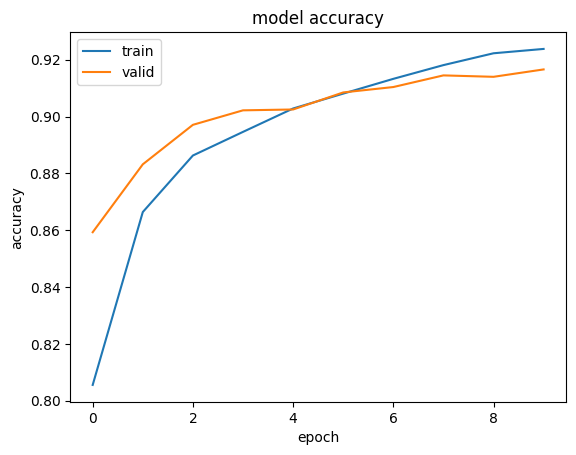

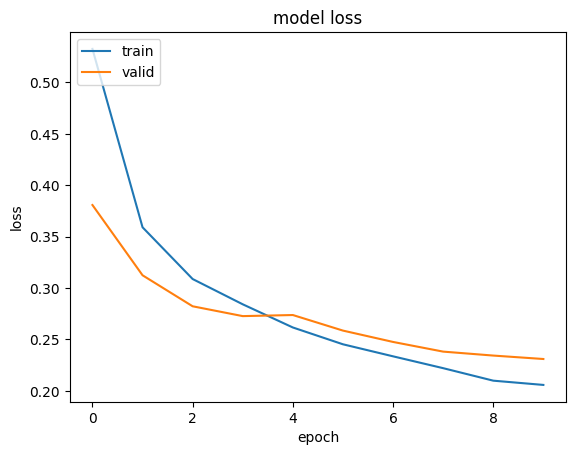

In [48]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# list all data in history
train_loss, train_accuracy, valid_loss, valid_accuracy = trainer.get_training_history()

# summarize history for accuracy and loss
plt.plot(train_accuracy)
plt.plot(valid_accuracy)
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "valid"], loc="upper left")
plt.show()

plt.plot(train_loss)
plt.plot(valid_loss)
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "valid"], loc="upper left")
plt.show()

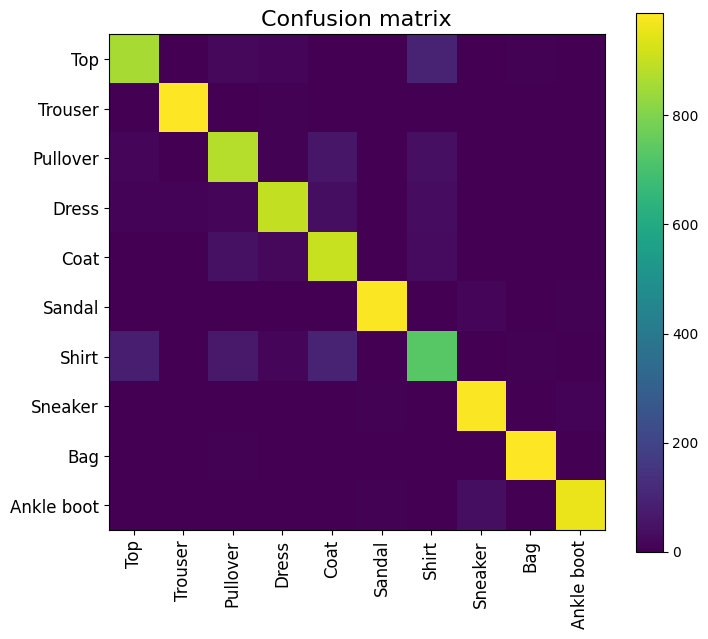

In [49]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# make predictions
y_pred, y_pred_classes, y_gt_classes = trainer.predict(testloader)
y_pred_prob = torch.max(y_pred, dim=1).values

from sklearn.metrics import accuracy_score, confusion_matrix

plt.figure(figsize=(8, 7))
plt.imshow(confusion_matrix(y_gt_classes, y_pred_classes))
plt.title("Confusion matrix", fontsize=16)
plt.xticks(np.arange(10), classes, rotation=90, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

## 2.2 Exploring Deep CNN Architectures [1.1% Bonus for All] <span style="color:green">**[W]**</span>


The network you have produced is rather simple relative to many of those used in industry and research. Researchers have worked to make CNN models deeper and deeper over the past years in an effort to gain higher accuracy in predictions. While your model is only a handful of layers deep, some state of the art deep architectures may include up to 150 layers. However, this process has not been without challenges.

One such problem is the problem of the exploding gradient. The initial weights assigned to the neural nets creating large losses. Big gradient values can accumulate to the point where large parameter updates are observed, causing gradient descents to oscillate without coming to global minima. What’s even worse is that these parameters can be so large that they overflow and return NaN values that cannot be updated anymore. 

Many tactics have been used in an effort to solve this problem. One architecture, named Gradient Clipping, solves the vanishing gradient problem in a unique way. Researchers from Massachusetts Institute of Technology dicussed about the mechanism and a theoretical explanation for the effectiveness of gradient clipping in training deep neural networks. Take a moment to explore how Gradient Clipping tackles the vanishing gradient problem by reading the original research paper here: https://arxiv.org/pdf/1905.11881 (also included as PDF in papers directory).


**Question:** In your own words, explain how Gradient Clipping addresses the exploding gradient problem in 1-2 sentences below: (Please type answers directly in the cell below.)


1. **Stabilizes Gradients**: Gradient Clipping prevents the exploding gradient problem by capping the gradient norm to a predefined threshold, ensuring that parameter updates remain stable and do not lead to erratic training behavior.

2. **Smooths Optimization**: By scaling down gradients that exceed the threshold, this technique enables the model to traverse non-smooth loss landscapes effectively, improving optimization performance.

3. **Enhances Convergence**: Empirical results show that Gradient Clipping accelerates convergence, making training more efficient and robust, especially for deep neural networks.


# 3: Random Forests [40pts + 2.1% Bonus for All] <span style="color:blue">**[P]**</span> <span style="color:green">**[W]**</span>

**NOTE**: Please use sklearn's ExtraTreeClassifier in your Random Forest implementation. [You can find more details about this classifier here.](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html)

For context, the general difference between an extra tree and decision tree classifier is that the decision tree optimizes which feature to reduce entropy on and at what value to split, while an extra tree randomly splits on the features given.


## 3.1 Random Forest Implementation [35pts] <span style="color:blue">**[P]**</span>

The decision boundaries drawn by decision or extra trees are very sharp, and fitting a tree of unbounded depth to a list of examples almost inevitably leads to **overfitting**. In an attempt to decrease the variance of an extra tree, we're going to use a technique called 'Bootstrap Aggregating' (often abbreviated 'bagging'). This stems from the idea that a collection of weak learners can learn decision boundaries as well as a strong learner. This is commonly called a Random Forest.

We can build a Random Forest as a collection of extra trees, as follows:

1. For every tree in the random forest, we're going to

   a) Subsample the examples with replacement. Note that in this question, the size of the subsample data is equal to the original dataset.

   b) From the subsamples in part a, choose attributes at random without replacement to learn on in accordance with a provided attribute subsampling rate. Based on what it was mentioned in the class, we randomly pick features in each split. We use a more general approach here to make the programming part easier. Let's randomly pick some features (65% percent of features) and grow the tree based on the pre-determined randomly selected features. Therefore, there is no need to find random features in each split.

   c) Fit an extra tree to the subsample of data we've chosen to a certain depth.

You can refresh your understanding with the lecture notes on random forests.

Classification for a random forest is then done by taking a majority vote of the classifications yielded by each tree in the forest after it classifies an example.

In the <strong>random_forest.py</strong> file, complete the following functions:

- <strong>\_bootstrapping</strong>: this function will be used in `bootstrapping()`
- <strong>fit</strong>: Fit the extra trees initialized in `__init__` with the datasets created in `bootstrapping()`. You will need to call `bootstrapping()`.

**NOTES:**

1. In the Random Forest Class, X is assumed to be a matrix with num_training rows and num_features columns where num_training is the number of total records and num_features is the number of features of each record. y is assumed to be a vector of labels of length num_training.
2. Look out for TODO's for the parts that need to be implemented
3. If you receive any `SettingWithCopyWarning` warnings from the Pandas library, you can safely ignore them.
4. Hint: when bootstrapping, set replace = False while creating col_idx


## 3.2 Hyperparameter Tuning with a Random Forest [5pts] <span style="color:blue">**[P]**</span>

In machine learning, hyperparameters are parameters that are set before the learning process begins. The max_depth, num_estimators, or max_features variables from 3.1 are examples of different hyperparameters for a random forest model. Let's first review the dataset in a bit more detail.

#### Dataset Objective

Imagine that we are a team of researchers working to track and document various information related to dry beans for a machine learning model that predicts what type of bean is represented. We know that there are multiple things to keep track of, such as the shapes and sizes that differentiate different types of beans. We will use the information we track and document in order to publish it for the general public.

After much reflection within the research team, we come to the conclusion that we can use past observations on bean images to create a model.

We will use our random forest algorithm from Q3.1 to predict the bean type.

You can find more information on the dataset [here](https://archive.ics.uci.edu/dataset/602/dry+bean+dataset).


_The barbunya bean, also known as the cranberry bean, was first bred in Colombia._

![A barbunya bean](data/images/barbunya.jpg)


#### Loading the dataset

The dataset that the company has collected has the following features:

There were 16 features used in this dataset.

Inputs:

1. Area: The area of a bean zone and the number of pixels within its boundaries
2. Perimeter: Bean circumference is defined as the length of its border
3. MajorAxisLength: The distance between the ends of the longest line that can be drawn from a bean
4. MinorAxisLength: The longest line that can be drawn from the bean while standing perpendicular to the main axis
5. AspectRatio: Defines the relationship between MajorAxisLength and MinorAxisLength
6. Eccentricity: Eccentricity of the ellipse having the same moments as the region
7. ConvexArea: Number of pixels in the smallest convex polygon that can contain the area of a bean seed
8. EquivDiameter Equivalent diameter, the diameter of a circle having the same area as a bean seed area
9. Extent Feature: The ratio of the pixels in the bounding box to the bean area
10. Solidity: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness: Calculated with the following formula: (4piA)/(P^2)
12. Compactness: Measures the roundness of an object
13. ShapeFactor1
14. ShapeFactor2
15. ShapeFactor3
16. ShapeFactor4

Output:

17. Target value:
    - Seker
    - Barbunya
    - Bombay
    - Cali
    - Dermosan
    - Horoz
    - Sira

Your random forest model will try to predict this variable.


In [50]:
import numpy as np
import pandas as pd

###############################
### DO NOT CHANGE THIS CELL ###
###############################
from sklearn import preprocessing

dry_bean_dataset = "./data/Dry_Bean_Dataset.csv"
df = pd.read_csv(dry_bean_dataset)

label_encoder = preprocessing.LabelEncoder()

X = df.drop(["Class"], axis=1)
y = label_encoder.fit_transform(df["Class"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
X_test = np.array(X_test)
X_train, y_train, X_test, y_test = (
    np.array(X_train),
    np.array(y_train),
    np.array(X_test),
    np.array(y_test),
)

In [51]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
assert X_train.shape == (9119, 16)
assert y_train.shape == (9119,)
assert X_test.shape == (4492, 16)
assert y_test.shape == (4492,)

(9119, 16) (9119,) (4492, 16) (4492,)


In the following codeblock, train your random forest model with different values for max_depth, n_estimators, or max_features and evaluate each model on the held-out test set. Try to choose a combination of hyperparameters that maximizes your prediction accuracy on the test set (aim for 85%+).

In **random_forest.py**, once you are satisfied with your chosen parameters, update the following function:

- **select_hyperparameters**: change the values for `max_depth`, `n_estimators`, and `max_features`to your chosen values

Submit this file to Gradescope. You must achieve at least a **85% accuracy** against the test set in Gradescope to receive full credit for this section.


In [52]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
from utilities.localtests import TestRandomForest

"""
Once you have implemented Random forest, you can run this cell. If you implemented _bootStrapping correctly,
then this cell should execute without any errors.
"""
TestRandomForest("test_bootstrapping").test_bootstrapping()

test_bootstrapping passed!


In [53]:
"""
TODO: 
n_estimators defines how many Extra trees are fitted for the random forest.
max_depth defines a stop condition when the tree reaches to a certain depth.
max_features controls the percentage of features that are used to fit each extra tree.

Tune these three parameters to achieve a better accuracy. n_estimators and max_depth must both
be at least 3 in value for moderately reliable answers. While you can use the provided test set
to evaluate your implementation, you will need to obtain 85% on the test set to receive full
credit for this section.
"""

import sklearn.ensemble
from random_forest import RandomForest
from sklearn import preprocessing

################# DO NOT CHANGE THIS RANDOM SEED ####################
student_random_seed = 4641 + 7641
#####################################################################

################# CHANGE THESE VALUES ###############################

n_estimators = 14  # Hint: Consider values between 3-15.
max_depth = 10  # Hint: Consider values betweeen 3-15.
max_features = 0.7  # Hint: Consider values betweeen 0.3-1.0.

In [54]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
random_forest = RandomForest(
    n_estimators, max_depth, max_features, random_seed=student_random_seed
)
random_forest.fit(X_train, y_train)
accuracy = random_forest.OOB_score(X_test, y_test)
print("accuracy: %.4f" % accuracy)

accuracy: 0.8621


**DON'T FORGET**: Once you are satisfied with your chosen parameters, change the values for `max_depth`, `n_estimators`, and `max_features` in the `select_hyperparameters()` function of your RandomForest class in `random_forest.py` to your chosen values, and then submit this file to Gradescope. You must achieve at least a **85% accuracy** against the test set in Gradescope to receive full credit for this section.


Below is a code block that plots a confusion matrix for the classifier's predictions on the test set. A few things to think about: What are some trends seen in the matrix? Why do they happen?


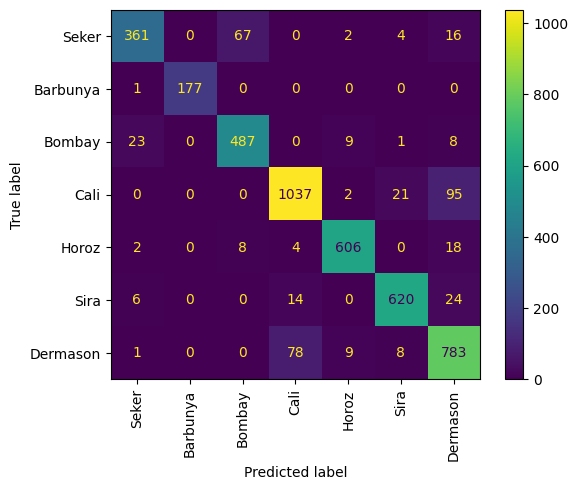

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

pred = random_forest.predict(X_test)
labels = ["Seker", "Barbunya", "Bombay", "Cali", "Horoz", "Sira", "Dermason"]
ConfusionMatrixDisplay.from_predictions(
    y_test, pred, display_labels=labels, xticks_rotation="vertical"
)
plt.show()

## 3.3 Plotting Feature Importance [1.1% Bonus for All] <span style="color:green">**[W]**</span>

While building tree-based models, it's common to quantify how well splitting on a particular feature in an extra tree helps with predicting the target label in a dataset. Machine learning practitioners typically use "Gini importance", or the (normalized) total reduction in entropy brought by that feature to evaluate how important that feature is for predicting the target variable.

Gini importance is typically calculated as the reduction in entropy from reaching a split in an extra tree weighted by the probability of reaching that split in the extra tree. Sklearn internally computes the probability for reaching a split by finding the total number of samples that reaches it during the training phase divided by the total number of samples in the dataset. This weighted value is our feature importance.

Let's think about what this metric means with an example. A high probability of reaching a split on feature A in an extra tree trained on a dataset (many samples will reach this split for a decision) and a large reduction in entropy from splitting on feature A will result in a high feature importance value for feature A. This could mean feature A is a very important feature for predicting the probability of the target label. On the other hand, a low probability of reaching a split on feature B in an extra tree and a low reduction in entropy from splitting on feature B will result in a low feature importance value. This could mean feature B is not a very informative feature for predicting the target label. **Thus, the higher the feature importance value, the more important the feature is to predicting the target label.**

Fortunately for us, fitting a sklearn.ExtraTreeClassifier to a dataset automatically computes the Gini importance for every feature in the extra tree and stores these values in a **feature_importances\_** variable. [Review the docs for more details on how to access this variable](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier.feature_importances_)

In the <strong>random_forest.py</strong> file, complete the following function:

- <strong>plot_feature_importance</strong>: Make sure to sort the bars in descending order and remove any features with feature importance of 0

In the cell below, call your implementation of `plot_feature_importance()` and display a bar plot that shows the feature importance values for at least one extra tree in your tuned random forest from Q3.2.


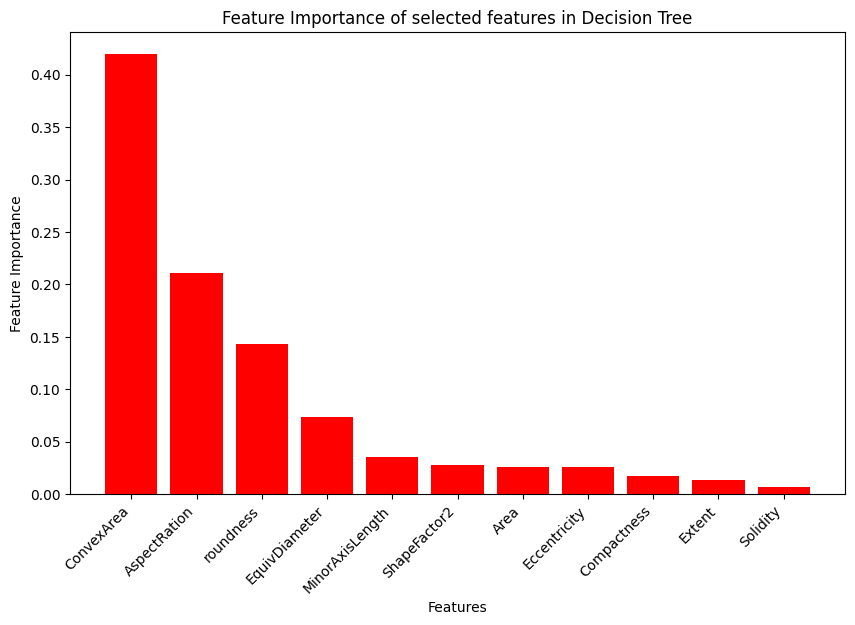

In [56]:
# TODO: Complete plot_feature_importance() in random_forest.py

random_forest.plot_feature_importance(X)

Note that there isn't one "correct" answer here. We simply want you to investigate how different features in your random forest contribute to predicting the target variable.

Also note that: the number of features can be different if you change max_features value since it ends up changing the number of features considered in bootstrapped datasets.


## 3.4 ADABoost [1% Bonus for All] <span style="color:blue">**[P]**</span>

In lecture we learn how to implement bootstrapping, but there is another common method used to prevent overfitting which also incorporates multiple decision trees: boosting. For our implementation, boosting is where you assign importances to multiple models (weak learners) and return the result of their averaged output (a single strong learner). This is done sequentially, with importances being updated after the training of each new tree rather than in parallel like in bootstrapping

Specifically, you will be implementing adaptive boosting (ADABoost) which reassigns importances to the randomized decision trees depending on their error weight.

Additional Resource: For a detailed walkthrough of ADABoost implementation, see [Implementing the AdaBoost Algorithm from Scratch](https://www.geeksforgeeks.org/implementing-the-adaboost-algorithm-from-scratch/)

Using their error weights you will recalculate the importances AKA `alpha` values. You can use this formula to do it per model:

$$ 
\alpha = \frac{1}{2} \log\left(\frac{1 - \text{error}}{\text{error} + 10^{-10}}\right) 
$$

Then you must update the error weights for all models for the next importance calculation by multiplying all weights using this formula:

$$
\text{Updated Weights (Not Normalized)} = \text{Weights} \times e^{\alpha \times \text{(Number of Incorrect Classifications)}}
$$

We give you predict_adaboost which returns the prediction from the result of all the trees. You must implement `adaboost()` which iterates over the number of estimators, training a new tree and then updating all trees' weights depending on its error rate.

In [57]:
# TODO: Complete adaboost() in random_forest.py

TestRandomForest("test_adaboost").test_adaboost()

test_adaboost passed!


Now we can test the accuracy of our model using the helper function `predict_adaboost()`! To pass Gradescope your accuracy should be above 85%!

In [58]:
adaboost_model = RandomForest(
    n_estimators, max_depth, max_features, random_seed=student_random_seed
)

# Train the AdaBoost ensemble using adaboost method
adaboost_model.adaboost(X_train, y_train)

# Evaluate the accuracy on the test set
y_pred = adaboost_model.predict_adaboost(X_test)
accuracy = np.mean(y_pred == y_test)
print("AdaBoost accuracy: %.4f" % accuracy)

AdaBoost accuracy: 0.9054


# 4: SVM [15 pts] <span style="color:green">**[W]**</span>


Consider a dataset with the following points in two-dimensional space:

| $$x_1$$ | $$x_2$$ | $$y$$ |
| ------- | ------- | ----- |
| -2.3    | 3       | -1    |
| -1.5    | -1.5    | -1    |
| 0.5     | 0.75    | -1    |
| 1.9     | 2.25    | -1    |
| -2.0    | 6.75    | 1     |
| -1.1    | 6.0     | 1     |
| 0.0     | 7.5     | 1     |
| 1.5     | 6.0     | 1     |


Here, $x_1$ and $x_2$ are features and $y$ is the label.

Support Vector Machines (SVMs) aim to find a hyperplane that separates data points of different classes with the maximum margin. The larger the margin, the better the model can generalize to unseen data. Fortunately, scikit-learn’s SVC class handles this computation for us programmatically.

## 4.1 Fitting an SVM classifier [10 pts] <span style="color:green">**[W]**</span>

### 4.1.1 Fit the SVM Classifier [7 pts]


Since the points are already linearly separable, determine the separating hyperplane using a linear SVM programatically. Record the weights (theta) and bias (intercept) terms for this separating hyperplane, rounded to three decimal places.

Hint: To do this, you'll need to import the `SVC` class from the `sklearn.svm` module and initialize the SVC with a linear kernel. Then you can fit the data and find the separating hyperplane. Finally, you can get the needed values using `svm.coef_` and `svm.intercept_`.

In [59]:
from sklearn.svm import SVC

X = np.array([[-2.3, 3.0],[-1.5, -1.5],[0.5, 0.75],[1.9, 2.25],[-2.0, 6.75],[-1.1, 6.0],[0.0, 7.5],[1.5, 6.0]])
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1])

svm = SVC(kernel='linear', C = 1)
svm.fit(X, y)
weights = svm.coef_
bias = svm.intercept_
print("Weights: ", weights)
print("Bias: ", bias)


Weights:  [[0.11091815 0.62229955]]
Bias:  [-2.61149751]


### 4.1.2 Plot the SVM Classifier [3 pts]

Plot the features $x_1$​ and $x_2$ using different colors to represent the labels $y$ (e.g., red for -1, blue for 1). Include the separating hyperplane on the plot. Make sure your plot clearly distinguishes the two classes and visually demonstrates the hyperplane.

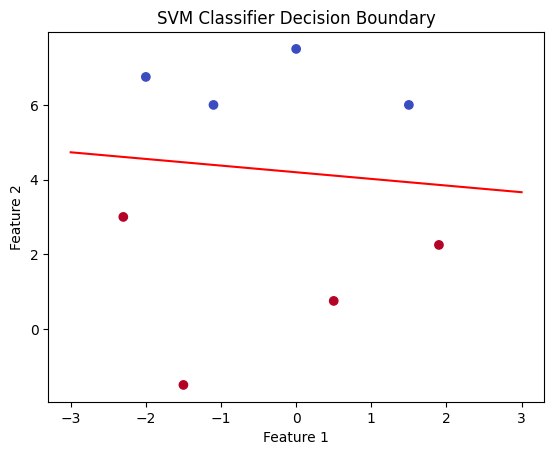

In [60]:
plt.scatter(X[:, 0], X[:, 1], c=-y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

xL = np.linspace(-3, 3, 100)
yL = (-weights[0][0] * xL - bias) / weights[0][1]
plt.plot(xL, yL, '-r', label='Hyperplane')
plt.title('SVM Classifier Decision Boundary')
plt.show()

## 4.2 Using Kernels [5 pts] <span style="color:green">**[W]**</span>

Suppose we added another point, (0.8, -6.5) with label 1, which causes the dataset to be non-linearly separable. This can be seen by plotting the new set of points, which is impossible to split by a hyperplane that achieves 100% accuracy. To solve this issue, SVM uses kernels, which transform the points in a dataset to a higher-dimensional space making them linearly separable. In section 4.1, you used a linear kernel, which didn't transform the dataset since it was already linearly separable. 

Create a specific kernel (transformation function) that could be applied to the dataset with the new point that makes the data linearly separable again.

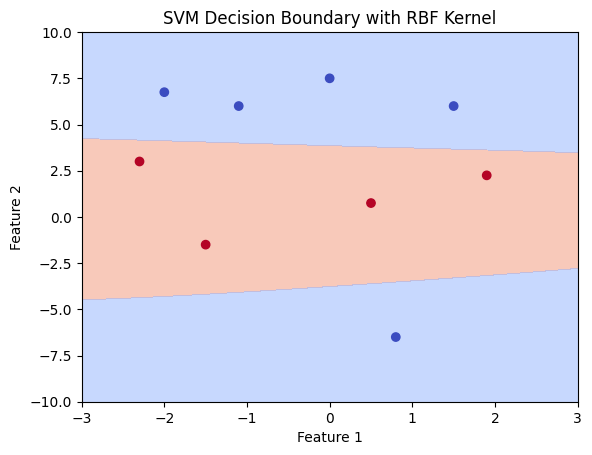

In [61]:
X = np.append(X, [[0.8, -6.5]], axis=0)
y = np.append(y, 1)

svmRBF = SVC(kernel='rbf', C = 1, gamma = 'scale')
svmRBF.fit(X, y)

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-10, 10, 500))
Z = svmRBF.decision_function(np.c_[xx.ravel(), yy.ravel()])

plt.contourf(xx, yy, Z.reshape(xx.shape), levels=[Z.min(), 0, Z.max()], cmap='coolwarm_r', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=-y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with RBF Kernel')
plt.show()

# 5: Next Character Prediction using Recurrent Neural Networks (RNNs) [6.8% Bonus for All] <span style="color:green">[W]</span> <span style="color:blue">[P]</span>


In this section, we’ll compare two foundational types of recurrent neural network architectures: Simple Recurrent Neural Networks (Simple RNNs) and Long Short-Term Memory networks (LSTMs). The goal is to train these models to generate text in the style of Macbeth by predicting the next character in a given sequence. This exercise will highlight how each architecture manages sequential dependencies in text generation.

## What are Recurrent Neural Networks?

Recurrent Neural Networks are a class of neural networks designed to handle sequential or time-series data, where the order of inputs matters. Unlike feedforward neural networks that treat each input independently, sequential networks maintain memory of previous inputs, making them ideal for tasks involving ordered data like text, time series, or video frames. These networks allow previous outputs to be used as inputs while having hidden states.

Common applications include:
- Text processing (language modeling, translation)
- Machine translation (translating from one language to the other)
- Time series prediction (stock prices, weather forecasting)

### Types of Recurrent Neural Networks
We can divide the applications of RNNs into four main categories:

- **One-to-One**
    - Takes a single input and produces a single output
    - Like feedforward neural networks
    - Example: Image classification (1 image → 1 label)

- **Many-to-One**
    - Takes a sequence as input but produces a single output
    - Example: Sentiment analysis (many words → 1 sentiment)
    - *This is what we'll be building for our character prediction task!*

- **One-to-Many**
    - Takes a single input and produces a sequence
    - Example: Image captioning (1 image → sequence of words)

- **Many-to-Many**
    - Takes a sequence and produces a sequence
    - Examples:
        - Translation (English sentence → French sentence)
        - Video frame prediction (sequence of frames → next frames)

Each type serves different purposes, and understanding which to use depends on your task's input and desired output structure.

In this section, our goal will be a **many-to-one** task: predicting the next character given a sequence of characters. Now let's take a look at the models we can use to accomplish this.


### Simple Recurrent Neural Networks

Simple Recurrent Neural Networks (RNNs) are the simplest form of recurrent neural networks. They are similar to feedforward networks, but have connections that loop back on themselves, allowing information from previous steps to influence the current processing step. This looping mechanism enables Simple RNNs to capture dependencies over time, which is especially useful for tasks involving language, where the context of earlier words or characters affects the final prediction.
Here's how Simple RNNs generally work:

1. At each timestep, the model:
   - Takes in a new input
   - Uses its current hidden state (memory of previous inputs)
   - Produces both an output and an updated hidden state

2. This process repeats for each element in the sequence, with the hidden state carrying information forward.

For our character prediction task, we'll use a many-to-one configuration:
- Input: We feed in characters one at a time (like "m", "a", "c", "b", "e")
- Hidden State: Gets updated with each new character
- Output: We only use the final prediction to guess the next character ("t")


#### Architecture

![intro_to_rnn](data/images/intro_to_rnn.webp)

Simple RNNs often suffer from the vanishing gradient problem when performing backpropagation through time. This issue arises because the gradients are repeatedly multiplied by the weight matrix as they propagate through each time step. If the weights are small, these multiplications cause the gradients to decrease exponentially, effectively "vanishing" as they travel backward, while large weights can lead to gradient "explosion." As a result, the network struggles to learn and retain long-term dependencies, meaning that early inputs in a sequence are gradually "forgotten," and training becomes ineffective for tasks requiring the processing of lengthy sequences.

For a detailed explanation of Simple RNNs and their limitations, see:
- [An Introduction to Recurrent Neural Networks (RNNs)](https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/)
- [The Vanishing Gradient Problem in RNNs](https://medium.com/metaor-artificial-intelligence/the-exploding-and-vanishing-gradients-problem-in-time-series-6b87d558d22)
- [Josh Starmer RNNs clearly explained](https://www.youtube.com/watch?v=AsNTP8Kwu80&pp=ygUOc3RhdHF1ZXN0IFJOTlM%3D)

Note: Simple/Vanilla RNN and RNN are often used interchangeably since Simple RNNs represent the most basic implementation of RNNs. However, RNN is actually a broader term that encompasses any neural network model which incorporates hidden states and uses its previous outputs as inputs.


### Long Short-Term Memory Networks (LSTMs)

Long Short-Term Memory networks (LSTMs) are an advanced type of recurrent neural network designed to better handle long sequences. Unlike Simple RNNs that have a single memory channel, LSTMs have two memory channels that allows the network to selectively remember or forget information over long sequences. 
At each timestep, an LSTM:
   - Takes in a new input
   - Uses two types of state:
     * Cell State: Like a long-term memory that can preserve important information
     * Hidden State: Like a working memory for immediate processing
   - Uses three gates to control information flow:
     * Forget gate: Decides what to remove from cell state
     * Input gate: Decides what new information to store from the current input
     * Output gate: Decides what parts of cell state to output


This dual-memory system allows LSTMs to maintain important information for longer periods while still processing new inputs effectively. Think of it like reading a book while taking notes - the cell state is like your notebook where you write down important information, while the hidden state is like your immediate attention to the current word and its context.

#### Architecture
![intro_to_lstm](data/images/intro_to_lstm.png)

For our character prediction task, we'll use a many-to-one LSTM configuration:
- Input: Characters fed in one at a time (like "m", "a", "c", "b", "e") as input
- Output: Get the prediced next character ("t") using the last hidden state


Simple RNNs struggle with long sequences because they try to pass all information through a single channel that gets increasingly noisy over time. LSTMs solve this by having two channels and specialized gates that allow the network to selectively update its memory state, rather than forcing all information through a single transformation. The memory cell pathway solves the vanishing gradient problem by providing a direct route for gradients to propagate backwards through time steps without being repeatedly multiplied by small numbers that would cause them to vanish. The gating mechanisms ensure this pathway remains relatively stable while still allowing the network to selectively update its memory when needed.

For a deeper dive into LSTMs and their gate mechanisms, refer to:
- [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- [The Role of Gates in LSTMs](https://towardsdatascience.com/lstm-by-example-using-tensorflow-feb0c1968537)
- [Josh Starmer LSTM clearly explained](https://www.youtube.com/watch?v=YCzL96nL7j0&pp=ygUOc3RhdHF1ZXN0IFJOTlM%3D)

### Data Preparation

#### Loading the text
- We'll use Shakespeare's Macbeth from Project Gutenberg
- The text is first standardized by:
  - Converting to lowercase for consistency
  - Standardizing line endings and spacing
- This standardized text is referred to as the 'corpus' - our primary dataset for training and inference
- We vectorize the text by treating every character in our text as an individual unit (e.g., 'macbeth' -> ['m', 'a', 'c'...])

##### Character-to-Index Mapping
   - Neural networks can't process raw text, so we need to convert characters to numbers. 
   - First, we find all the unique characters in our text (including alphabets and special characters like spaces and punctuations). This forms our vocabulary, whose size we call the vocabulary size
   - Each character in the vocabulary receives a unique integer assignment using the default ASCII value
   - We use a dictionary to store this mapping: {'a':1, 'b':2, 'c':3, ...}
   - This mapping enables bidirectional conversion between characters and integers for model input and output interpretation
   - We use this mapping to convert the vector of text into a vector of numerical values.
   
##### Index Representation
   - You might be thinking that assigning numbers to letters based on alphabetical order seems rather arbitrary - and you'd be absolutely right! This is precisely why we need smarter index representations
   - Using raw indices (like 1, 2, 3) implies an ordering and magnitude that doesn't exist
   - For example, 'b' (2) is not "twice as much" as 'a' (1)
   - We need a more sophisticated way to represent characters that avoids these misleading numerical relationships
   
      a) **One-Hot Encoding**: Convert index to binary vector
        - Each index becomes a vector of zeros with a single 1 at the index of the character's value/index
        - Example: 
          - index 1 ('a') → [0,1,0,0,...,0] (length 40)
          - index 5 ('e') → [0,0,0,0,1,0,...,0] (length 40)
        - Sparse (mostly zeros)
        - No relationship between characters (both vowels 'a' and 'e' are completely different vectors)
      
      b) **Embeddings**: Convert index to learned dense vector
        - Each character's index gets transformed into a list of numbers (a dense vector)
        - Think of it like assigning each character a unique point a higher dimension coordinate plane
        - The motivation is that we can position similar characters close to each other and transform discrete data like letters or words into a continous vector space that the model can use to make predictions from
        - What makes embedding layers special is that they're learnable! The model figures out the best way to represent characters based on your specific data and task
        - This is super useful since what makes characters "similar" changes between tasks - the model learns what similarity means for your specific case and groups characters accordingly
        - The embedding layer's dimension parameter determines how many numbers we use to represent each character (the size of the vector space)
        - Let's look at a real example with embedding dimension 4:
          - The letter 'a' might become → [0.2, -0.5, 0.1, 0.8]
          - The letter 'e' might become → [0.3, -0.4, 0.2, 0.7]
        - In this example, model discovered that 'a' and 'e' are both vowels and represents them close to each other
        - Additionally, embeddings are more memory efficient because they are dense (non-sparse) unlike one-hot vectors

   - For our model, we will be using an embedding layer in the model for index representations. Since this is a learnable layer, it will be part of our model architecture and not pre-processing. 


#### Creating training data
- When preparing text data, we need to break it into fixed-length sequences for training. Each sequence becomes a training example where we try to predict the next character. 
- Using a sliding window approach, we move through the text step by step. The sequence length (context window) is a key hyperparameter - too short and the model lacks context, too long and training becomes computationally intensive. For example, with text "macbeth" (context window=4):
  ```
  Window 1: "macb" → predict "e"
  Window 2: "acbe " → predict "t"
  Window 3: "cbet" → predict "h"
  ```
- Our input data is size (`NUM_SEQUENCES`, `SEQUENCE_LEN`), where `NUM_SEQUENCES` is the number of sequences of size `SEQUENCE_LEN` in the text
- Our target data is size (`NUM_SEQUENCES`, `1`) representing all the next characters for all sequences in the text
- NOTE: While we show characters in the examples above for clarity, remember that the actual input and target data are numerical indices, not the characters themselves


Please refer to <strong>preprocess_text_data</strong> located in utilities for more details.


In [62]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from utilities.utils import preprocess_text_data

# load and preprocess text
text = requests.get("https://www.gutenberg.org/files/1533/1533-0.txt").text
DATA = preprocess_text_data(text)

# unpack processed data components
X, Y, TEXT, CHAR_INDICES, INDICES_CHAR, VOCAB, VOCAB_SIZE, SEQUENCE_LEN = (
    DATA["x"],
    DATA["y"],
    DATA["text"],
    DATA["char_indices"],
    DATA["indices_char"],
    DATA["vocab"],
    DATA["vocab_size"],
    DATA["sequence_len"],
)

print("Length of Corpus: ", len(TEXT))
print("Vocabulary Map: ", CHAR_INDICES)
print(f"Vocabulary Size: ", VOCAB_SIZE)
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

Length of Corpus:  102188
Vocabulary Map:  {' ': 0, '!': 1, ',': 2, '-': 3, '.': 4, ':': 5, ';': 6, '?': 7, 'a': 8, 'b': 9, 'c': 10, 'd': 11, 'e': 12, 'f': 13, 'g': 14, 'h': 15, 'i': 16, 'j': 17, 'k': 18, 'l': 19, 'm': 20, 'n': 21, 'o': 22, 'p': 23, 'q': 24, 'r': 25, 's': 26, 't': 27, 'u': 28, 'v': 29, 'w': 30, 'x': 31, 'y': 32, 'z': 33}
Vocabulary Size:  34
X shape: (102158, 30)
Y shape: (102158, 1)


### Data Structure
Final preprocessed data includes:
- <strong>X</strong>: Input sequences 
    - (shape: [`NUM_SEQUENCES`, `SEQUENCE_LEN`])
    - Contains all character sequences of length SEQUENCE_LEN
- <strong>Y</strong>: Target characters 
    - (shape: [`NUM_SEQUENCES`, `1`])
    - Contains the next character that follows each sequence in X
- <strong>VOCABULARY MAP</strong>: The mapping from all unique characters in the text and their numerical representations
- <strong>VOCAB_SIZE</strong>: Total number of unique characters
- <strong>SEQUENCE_LEN</strong>: Length of input sequences

## 5.1 Model Architecture [4.4% Bonus for All] <span style="color:blue">[P]</span>

Before diving into the specific architectures, let's understand how data shapes transform through the embedding layer.

Input Sequence Shape Flow:
1. Initial input: (BATCH_SIZE, SEQUENCE_LEN)
   - BATCH_SIZE sequences containing SEQUENCE_LEN integers, where each integer represents a character from our vocabulary
   - Example: If BATCH_SIZE=32 and SEQUENCE_LEN=15, shape is (32, 15)

2. Embedding Layer: (BATCH_SIZE, SEQUENCE_LEN, EMBEDDING_DIM)
   - Transforms each integer into a vector of size EMBEDDING_DIM
   - Example: If EMBEDDING_DIM=64:
     - Each character index becomes a vector of 64 numbers
     - Shape expands from (32, 15) to (32, 15, 64)
     - This means: 32 sequences, each 15 characters long, each character now represented by 64 numbers

### 5.1.1 Defining the Simple RNN Model [2.2% Bonus for All]

In this part, you need to build a simple recurrent neural network using tensorflow. The architecture of the model is outlined below:

![rnn_architecture](data/images/rnn_architecture.png)

**[EMBEDDING - Simple RNN - FC - ACTIVATION]**
> **EMBEDDING**: The Embedding layer maps each integer (representing a character) in the input sequence to a dense vector representation. Each character index becomes a vector of **embedding dimension**. It has an input dimension of **vocab_size** (the total number of unique characters or tokens) and an output dimension defined by **embedding_dim**. This transformation allows the model to capture semantic relationships in the data.
> - Input shape: (batch_size, sequence_length) - A sequence of character indices
> - Output shape: (batch_size, sequence_length, embedding_dim) - Each character transformed into an embedding vector

> **Simple RNN**: This layer processes the sequence data, passing information through time steps to learn temporal patterns. It has **rnn_units** neurons, determining the model's ability to capture dependencies in the sequential data.
> - Input shape: (batch_size, sequence_length, embedding_dim) - Sequence of embedding vectors
> - Output shape: (batch_size, rnn_units) - Final state output

> **FC (Dense Layer)**: A fully connected layer that transforms the RNN output to match the number of classes or possible output tokens. It has **vocab_size** neurons, ensuring that each output corresponds to a unique token or class.
> - Input shape: (batch_size, rnn_units) - RNN final state
> - Output shape: (batch_size, vocab_size) - Raw scores for each possible character

> **ACTIVATION (Softmax)**: The softmax activation function is applied to the output layer, producing a probability distribution over the vocabulary, allowing the model to interpret each output as a confidence level for each class.
> - Input shape: (batch_size, vocab_size) - Raw scores
> - Output shape: (batch_size, vocab_size) - Probability distribution over characters


You can refer to the following documentation on tensorflow layers for more details:
- [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)
- [Simple RNN](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN)
- [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
- [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation)

<strong>TODO:</strong> Implement the <strong>define_model</strong> function in <strong>rnn.py</strong>. 

In [63]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from rnn import RNN

rnn_model = RNN(VOCAB_SIZE, SEQUENCE_LEN)
rnn_model.set_hyperparameters()
rnn_model.define_model()
rnn_model.build_model()
rnn_model.model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)     │ (None, 30, 256)        │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_layer (SimpleRNN)    │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 34)             │         4,386 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_layer (Activation)   │ (None, 34)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,370 (243.63 KB)

 Trainable params: 62,370 (243.63 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
from utilities.localtests import TestRNN

tester = TestRNN("test_rnn_architecture").test_rnn_architecture()

test_rnn_architecture passed!


### 5.1.2 Defining the LSTM Model [2.2% Bonus for All]

In this part, you need to build a long short-term memory (LSTM) network as described below. The architecture of the model is outlined below:

![lstm_architecture](data/images/lstm_architecture.png)

**[EMBEDDING - LSTM - FC - ACTIVATION]**
> **EMBEDDING**: The Embedding layer maps each integer in the input sequence to a dense vector representation. It has an input dimension of **vocab_size** (the total number of unique characters or tokens) and an output dimension defined by **embedding_dim**. This transformation allows the model to capture semantic relationships in the data.
> - Input shape: (batch_size, sequence_length) - A sequence of character indices
> - Output shape: (batch_size, sequence_length, embedding_dim) - Each character transformed into an embedding vector

> **LSTM**: This layer processes the sequence data, passing information through time steps to learn temporal patterns. It has **lstm_units** neurons, determining the LSTM ability to capture dependencies in the sequential data.
> - Input shape: (batch_size, sequence_length, embedding_dim) - Sequence of embedding vectors
> - Output shape: (batch_size, lstm_units) - Final state output

> **FC (Dense Layer)**: A fully connected layer that transforms the LSTM output to match the number of classes or possible output tokens. It has **vocab_size** neurons, ensuring that each output corresponds to a unique token or class.
> - Input shape: (batch_size, lstm_units) - LSTM final state
> - Output shape: (batch_size, vocab_size) - Raw scores for each possible character

> **ACTIVATION (Softmax)**: The softmax activation function is applied to the output layer, producing a probability distribution over the vocabulary, allowing the model to interpret each output as a confidence level for each class.
> - Input shape: (batch_size, vocab_size) - Raw scores
> - Output shape: (batch_size, vocab_size) - Probability distribution over characters


You can refer to the following documentation on tensorflow layers for more details:
- [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)
- [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
- [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
- [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation)

<strong>TODO:</strong> Implement the <strong>define_model</strong> function in <strong>lstm.py</strong>.

In [65]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from lstm import LSTM

lstm_model = LSTM(VOCAB_SIZE, SEQUENCE_LEN)
lstm_model.set_hyperparameters()
lstm_model.define_model()
lstm_model.build_model()
lstm_model.model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)     │ (None, 34, 256)        │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 34)             │         4,386 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_layer (Activation)   │ (None, 34)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,210 (821.13 KB)

 Trainable params: 210,210 (821.13 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from utilities.localtests import TestLSTM

tester = TestLSTM("test_lstm_architecture").test_lstm_architecture()

test_lstm_architecture passed!


## 5.2 RNN vs LSTM Model Text Generation Training Comparison Analysis [2.4% Bonus for All] <span style="color:green">[W]</span>

Next, we'll train our RNN and LSTM models with their respective hyperparameters for character-level text generation. The model architecture is designed to process fixed-length sequences and predict the next most likely character based on the learned patterns.

During training, we need one final transformation of our target data. 
- As shown in both architectures, the model outputs a probability distribution over all possible characters (VOCAB_SIZE)
- To compare this with our target data, we convert our target indices into one-hot vectors
- For example, if our target is 'e' or 5 and VOCAB_SIZE is 34:
  - Target index: `[5]` → One-hot: `[0, 0, 0, 0, 1, 0, ..., 0]` (length 34)
- This transformation happens in the training loop, converting Y from shape (BATCH_SIZE, 1) to (BATCH_SIZE, VOCAB_SIZE)
- The categorical cross-entropy loss can then compare our predicted probability distribution with this one-hot target distribution


#### Training Configuration
- **Optimizer**: RMSprop (Root Mean Square Propagation) optimizer for efficient training of recurrent networks. Read more about it [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop).
- **Loss Function**: Categorical crossentropy to measure accuracy of predicted probability distribution. Read more about it [here](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
- **Training Parameters**: Number of epochs and batch size are defined in the hyperparameters section of `rnn.py` and `lstm.py` respectively

The core training loop implementation can be found in `base_sequential_model.py`.

NOTE: The initial model training may take 10-15 minutes per model. After that, the function will automatically load the saved weights stored in the `model_weights` directory, making subsequent runs much faster. If you want to retrain from scratch instead of using saved weights, you can either:
- Set `train_from_scratch=True` in the parameters 
- Delete the existing weights from the `model_weights` directory

#### Training Visualization
To monitor the training progress:
- A plot showing loss metrics across epochs will be generated
- This helps identify potential overfitting or convergence issues
- The visualization will be displayed automatically after training completes

Loaded saved RNN model and weights.


/Users/chetanreddy.b/.pyenv/versions/3.12.6/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


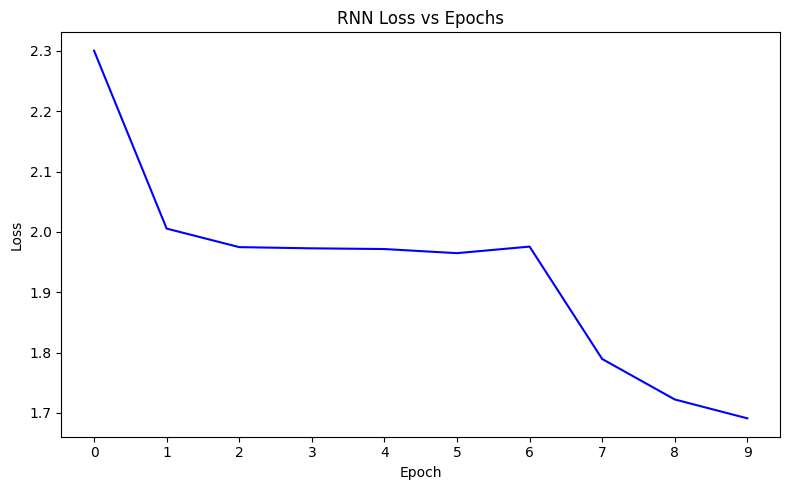

In [67]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

rnn_model.train(x=X, y=Y, train_from_scratch=False)
rnn_model.plot_loss()

Loaded saved LSTM model and weights.


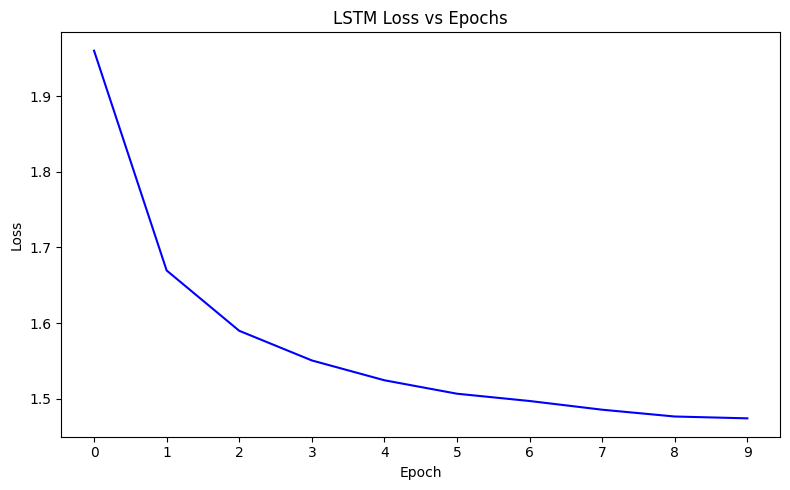

In [68]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

lstm_model.train(x=X, y=Y, train_from_scratch=False)
lstm_model.plot_loss()

After training both models, we can now use them to generate text in the style of Macbeth. The generation process involves three key components:

1. Seed Selection
   - Start with a random seed sequence from our text corpus
   - This sequence provides initial context for the generation

2. Prediction Loop
   - Model predicts probability over all characters based on current sequence and we sample next character
   - Append generated character to the sequence
   - Slide window forward by one character to maintain context length and predict using generated character

3. Temperature Parameter
   - Controls the randomness of predictions:
     - Lower values (< 0.5): More conservative, deterministic text
     - Higher values (> 1.0): More diverse but potentially less coherent text
     - Default value of 0.5 balances coherence and creativity

Below, we use our TextGenerator class to generate samples from both models:

In [69]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from text_generator import TextGenerator

generator = TextGenerator(CHAR_INDICES, INDICES_CHAR, SEQUENCE_LEN)

In [70]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

start_index = random.randint(0, len(TEXT) - SEQUENCE_LEN - 1)
seed_text = TEXT[start_index : start_index + SEQUENCE_LEN]

generator.generate(model=rnn_model, seed_text=seed_text, length=150, temperature=0.75)
generator.generate(model=lstm_model, seed_text=seed_text, length=150, temperature=0.75)

-------------------- RNN Model --------------------
Prompt: ay a sorry sight. macbeth. the
Model: reth honoun. fleantous to ford. fishd hand. and not keepledice time hawdorfens, like to secord. with know to here intery fort, and valad the be have d
-------------------- LSTM Model --------------------
Prompt: ay a sorry sight. macbeth. the
Model: y newtry 

[codecarbon INFO @ 22:23:13] Energy consumed for RAM : 0.001100 kWh. RAM Power : 24.0 W
[codecarbon INFO @ 22:23:13] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:23:13] 0.003048 kWh of electricity used since the beginning.


know, marter all with they thaiked wither off, my done, i will? what i wall whose should ten the see be murderer. macduff. anon or their way,



Analyze your experience training Simple RNN and LSTM models for Macbeth character prediction and answer the following:

1. Identify and explain a real-world application where Simple RNN would be more suitable than LSTM
2. Identify and explain a real-world application where LSTM would be more suitable than Simple RNN

For each case, support your answer using evidence from atleast 1 of these aspects from your training:

A. Generated Text Quality
- What patterns and quality differences did you observe in the text output?

B. Training Duration
- How long did the model take to train? 

C. Loss Convergence
- How did the loss values change across training epochs?

D. Final Loss Achieved
- What was the final loss produced by the model?

You can research and add other considerations to strengthen your argument, but ensure you include atleast 1 observed metric from your training. Some additional considerations include:
- Inference speed
- Memory requirements
- Ability to maintain context
- Simplicity of architecture

You will receive full credit if you use evidence from training and make a sound argument about why one model would be more suitable than the other for both cases.


##### Sample Response Format
A. Simple RNN Best Use Case: [Application Name]
- Choose 1+ observed metrics:
   - [Metric name]: [What you observed in your training]
- Why this matters: [Explain how your evidence supports using RNN over LSTM for this application]

B. LSTM Best Use Case: [Application Name]
- Choose 1+ observed metrics:
   - [Metric name]: [What you observed in your training]
- Why this matters: [Explain how your evidence supports using LSTM over RNN for this application]

Optional, but recommended: Add theoretical considerations to strengthen your argument
- [Theoretical difference & why it matters for your chosen application]


**YOUR ANSWER HERE**

### A. Simple RNN Best Use Case: Real-Time Autocomplete Systems

- **Metric: Training Duration**
  
  - **Observation:** The Simple RNN model trained significantly faster, completing each epoch in approximately **8-10 seconds**, whereas the LSTM model took around **28-32 seconds** per epoch.
  
- **Why this matters:**
  
  - **Efficiency in Time-Critical Applications:** In real-time autocomplete systems like say stock markets, speed is essential to provide instant suggestions as users type. The faster training and inference times of Simple RNNs make them ideal for such applications, ensuring that the system remains responsive without noticeable delays.

### B. LSTM Best Use Case: Advanced Text Generation

- **Metric: Generated Text Quality**
  
  - **Observation:** The LSTM model generated more coherent and contextually relevant text compared to the Simple RNN. For example, the LSTM produced:
    
    ```
    "in. they plight they newt we must and here stake anonter and alahughts with for their on they anonnage, yet tranger anontice, anon they all they which"
    ```
    
    In contrast, the Simple RNN generated:
    
    ```
    "in. the all hather. fay. prom son. have and be hell from throldst the give for son. give to hath tas word macbeth. not hear onlice with time a has mac"
    ```
    
    The LSTM's output demonstrates better structure and reduced repetition. (when I experimented with .35 temp I saw RNNs just repeating stuff over and over, while LSTMs in contrast used a very diverse set of words and produced coherent responses)
  
- **Why this matters:**
  
  - **Maintaining Context Over Longer Sequences:** Advanced text generation tasks, such as story writing or complex narrative creation, require the model to maintain context and produce meaningful, structured text. LSTMs excel in these areas by effectively capturing long-term dependencies, resulting in more coherent and diverse text outputs compared to Simple RNNs.

### Theoretical Considerations

- **Ability to Maintain Context:**
  
  - **Simple RNNs:** While they are capable of handling sequential data, Simple RNNs often struggle with long-term dependencies due to the vanishing gradient problem. This limitation makes them less effective for tasks that require understanding context spread over extended sequences.
  
  - **LSTMs:** Designed to overcome the limitations of Simple RNNs, LSTMs incorporate memory cells and gating mechanisms that allow them to preserve and regulate information over longer sequences. This design enables them to maintain contextual relevance, making them suitable for complex tasks that require understanding and generating coherent narratives.

- **Simplicity vs. Complexity:**
  
  - **Simple RNNs:** Their straightforward architecture makes them easier to implement and train, especially for simpler tasks with shorter sequences. They are lightweight and require less computational power, which is advantageous in resource-constrained environments.
  
  - **LSTMs:** Although more complex due to additional gates and memory cells, LSTMs provide enhanced capabilities for handling intricate patterns and dependencies within the data. This complexity is justified for applications that demand a higher level of contextual understanding and coherence in the generated outputs.

### Summary

- **Simple RNN:**
  - **Best for:** Lightweight, real-time applications with short-term dependencies.
  - **Evidence:** Faster training (**~8-10 seconds per epoch**) and efficient handling of basic sequential patterns.
  
- **LSTM:**
  - **Best for:** Advanced text generation and tasks requiring coherent, context-aware sequences.
  - **Evidence:** Lower final loss (**1.4598 vs. 1.6919**) and generation of more structured, meaningful text outputs.


In [71]:
tracker.stop()

[codecarbon INFO @ 22:23:17] Energy consumed for RAM : 0.001122 kWh. RAM Power : 24.0 W
[codecarbon INFO @ 22:23:17] Energy consumed for all CPUs : 0.001988 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:23:17] 0.003110 kWh of electricity used since the beginning.
/Users/chetanreddy.b/.pyenv/versions/3.12.6/lib/python3.12/site-packages/codecarbon/output_methods/file.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([dict(total.values)])])


0.0014132958073730254